In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 5.21MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [2]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

In [3]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 10000000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


# **Part 1**

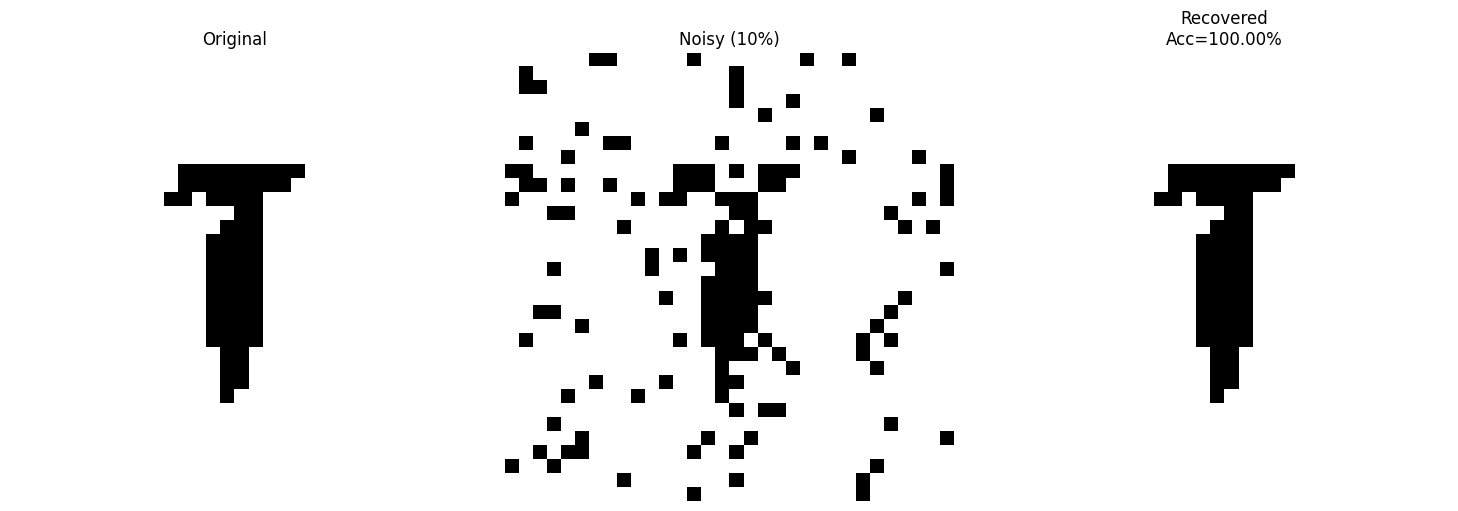

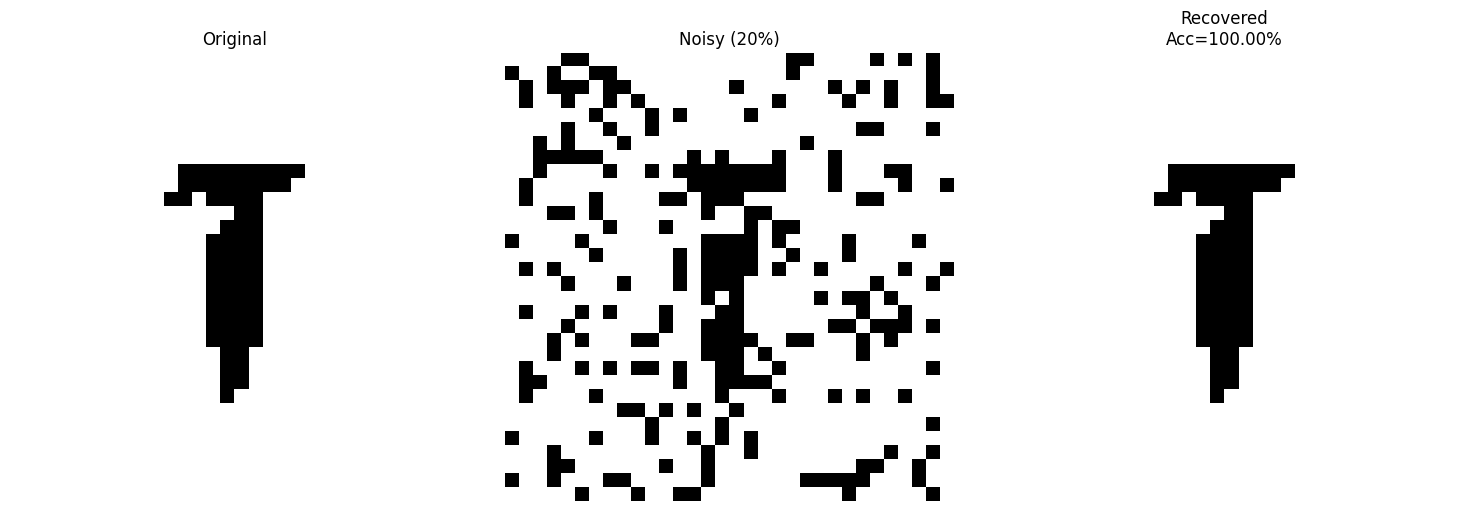

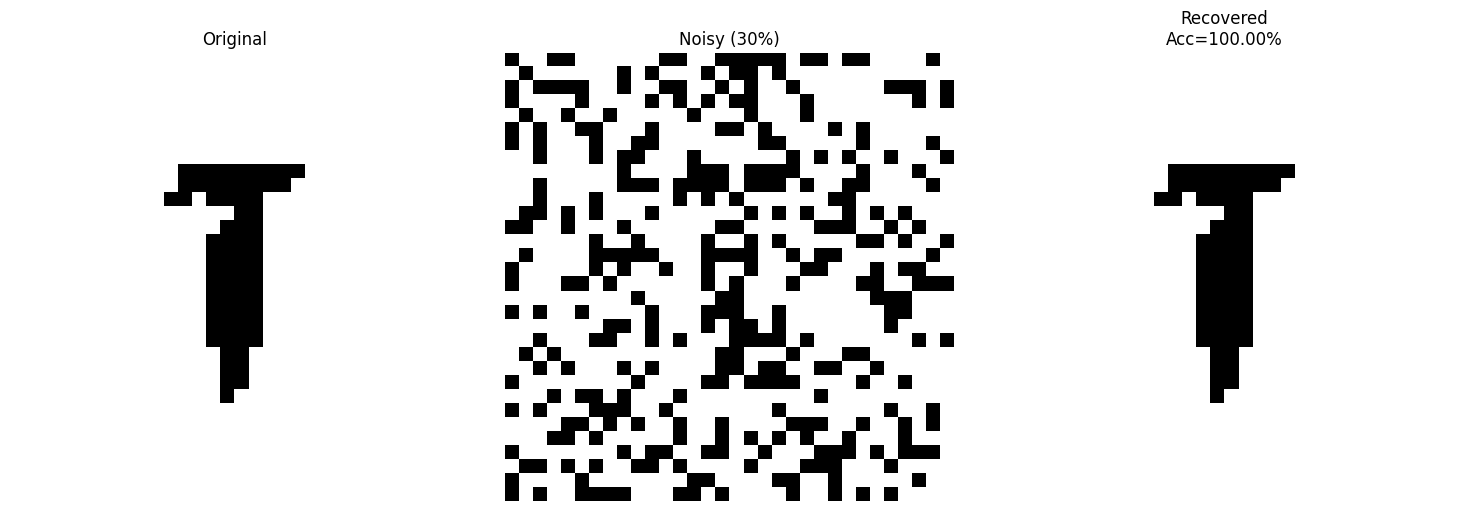

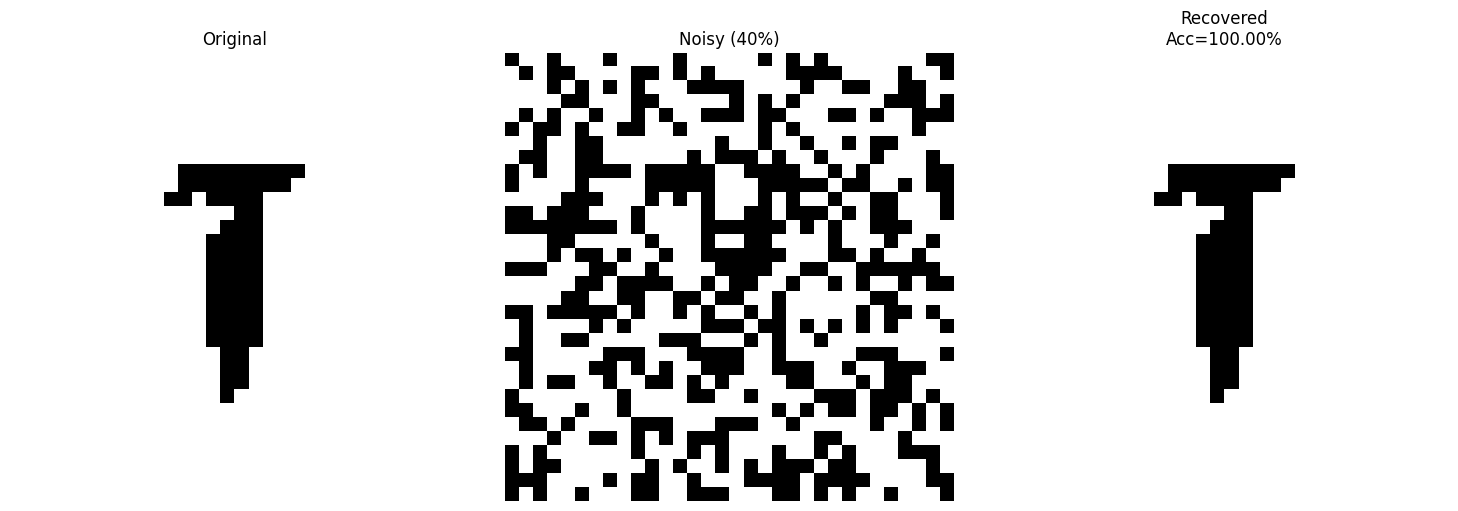

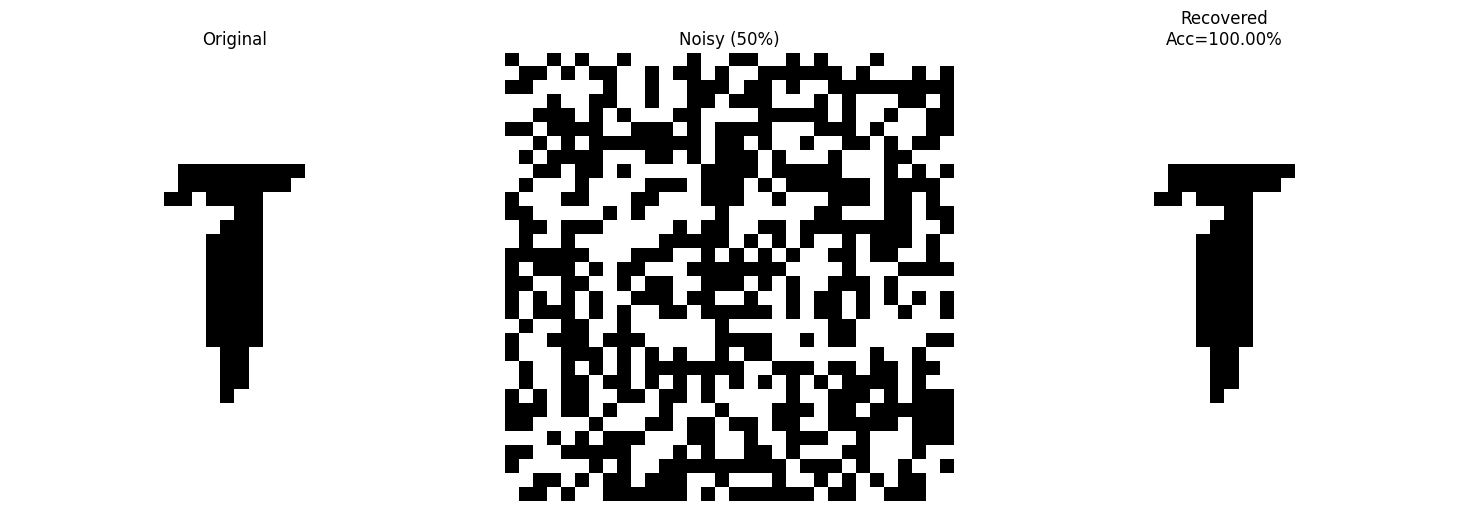

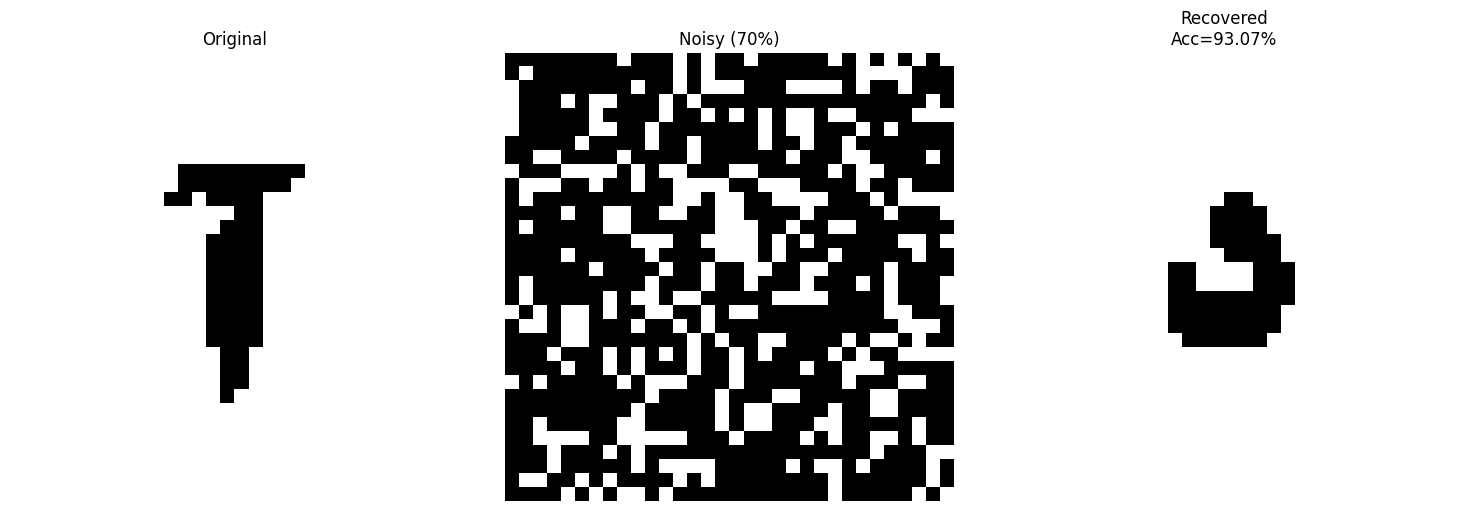

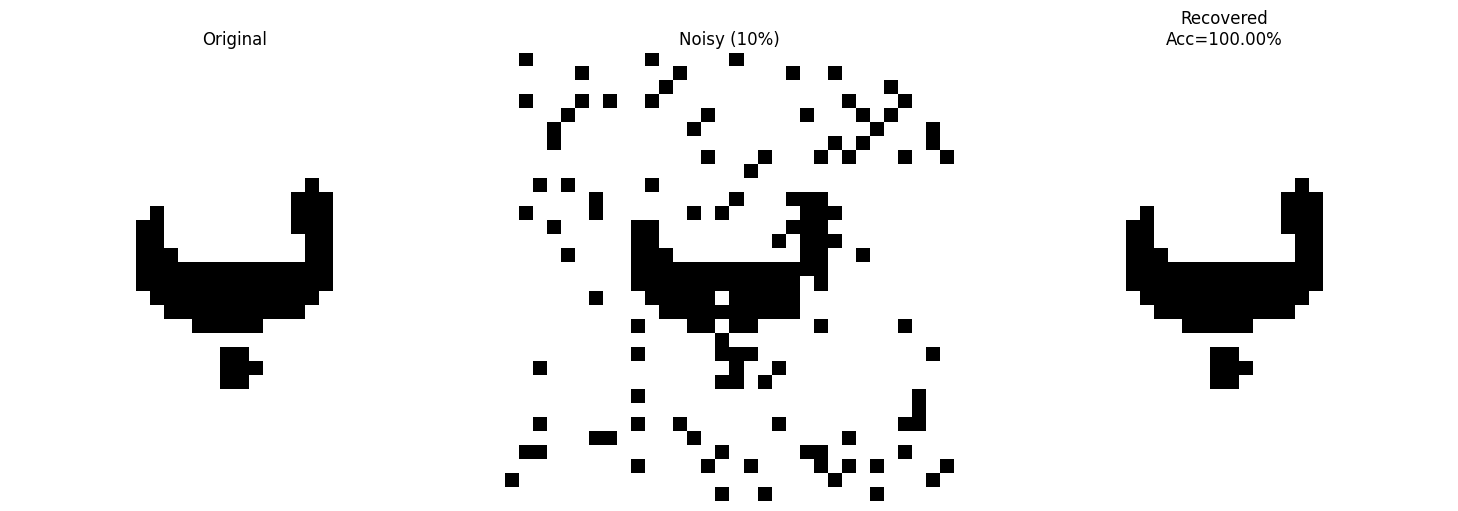

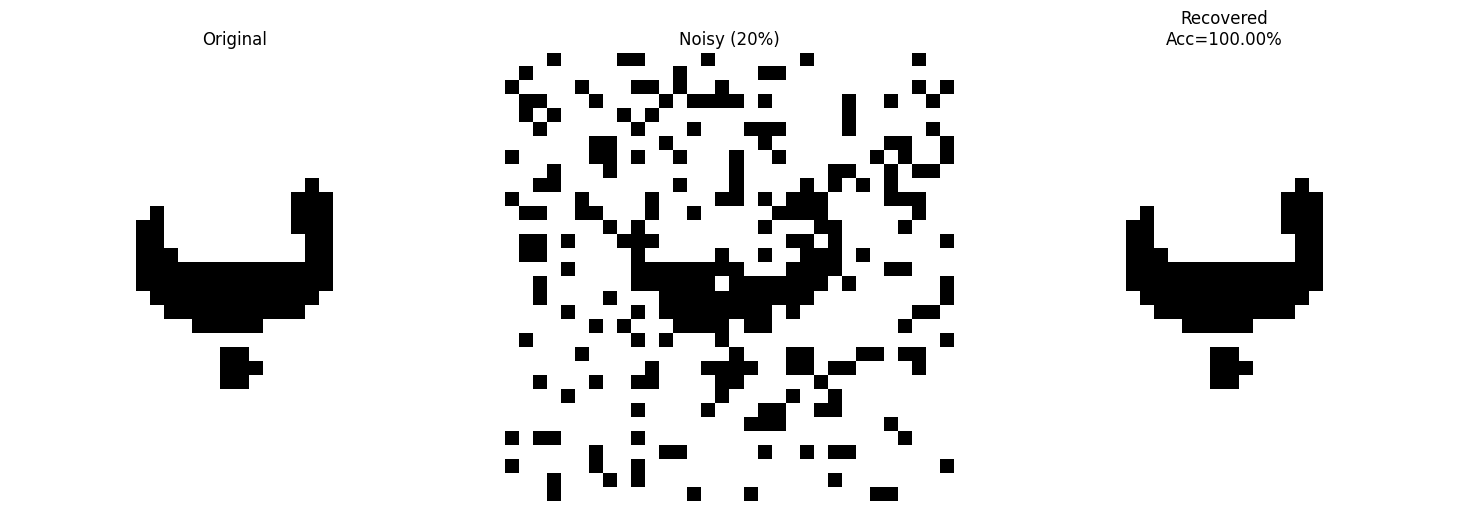

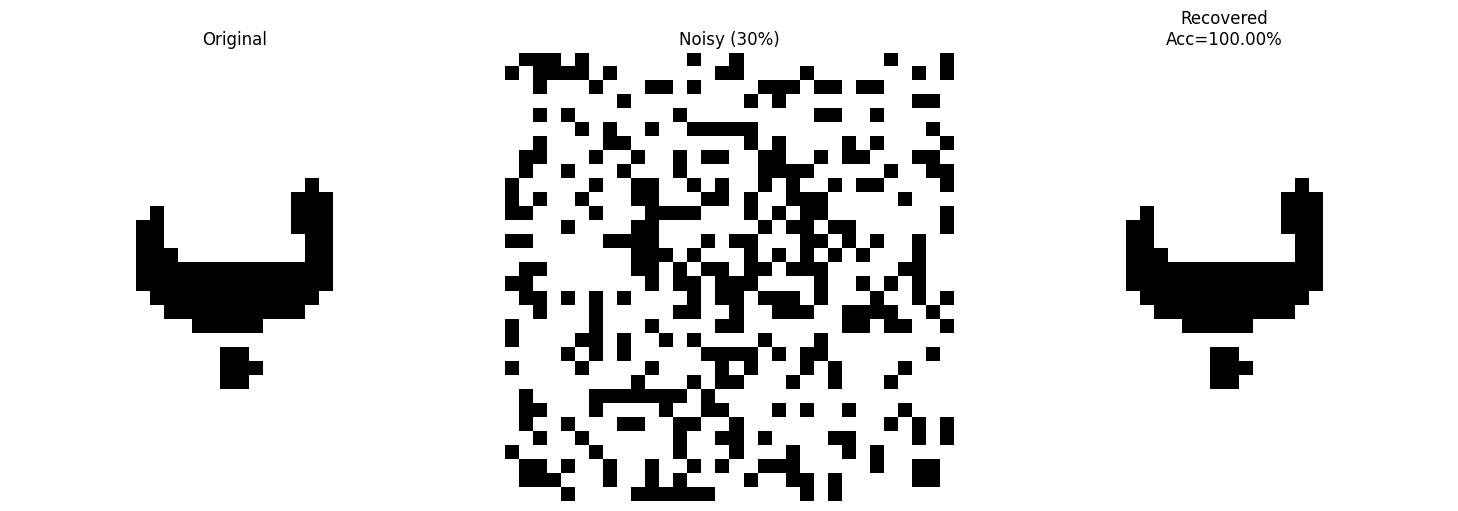

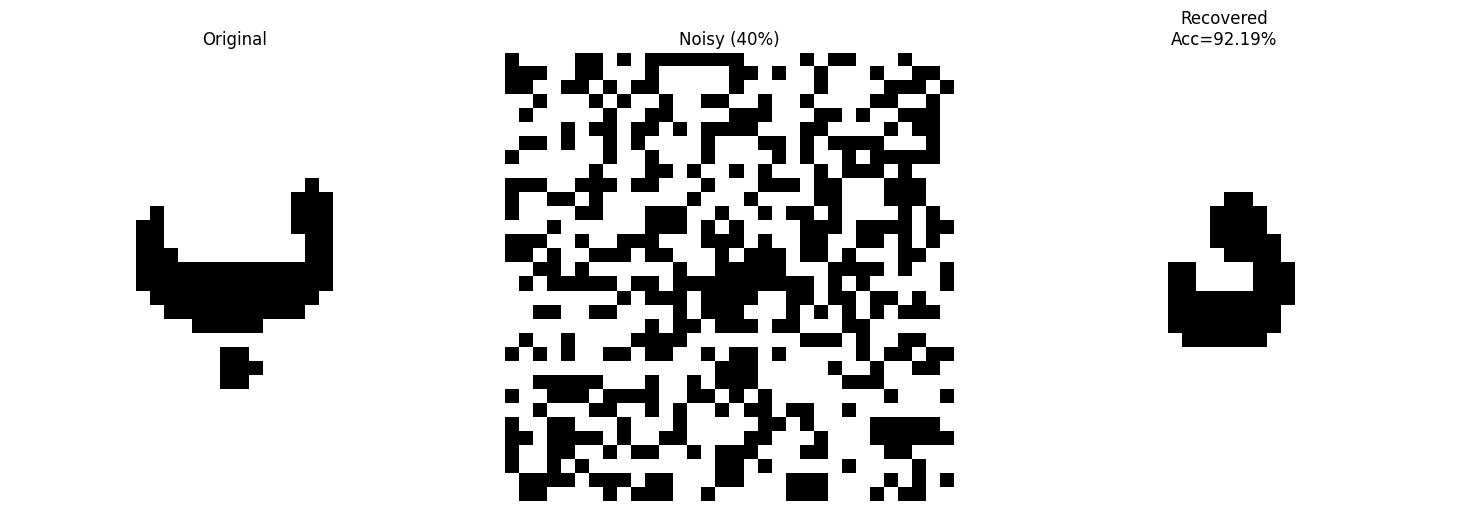

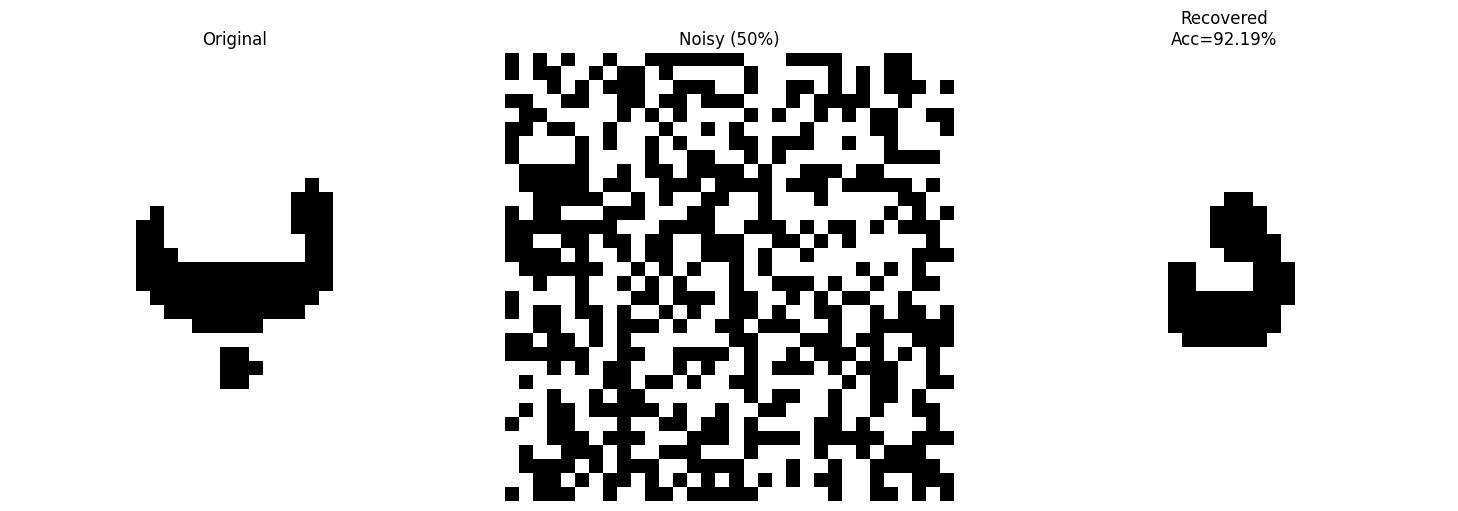

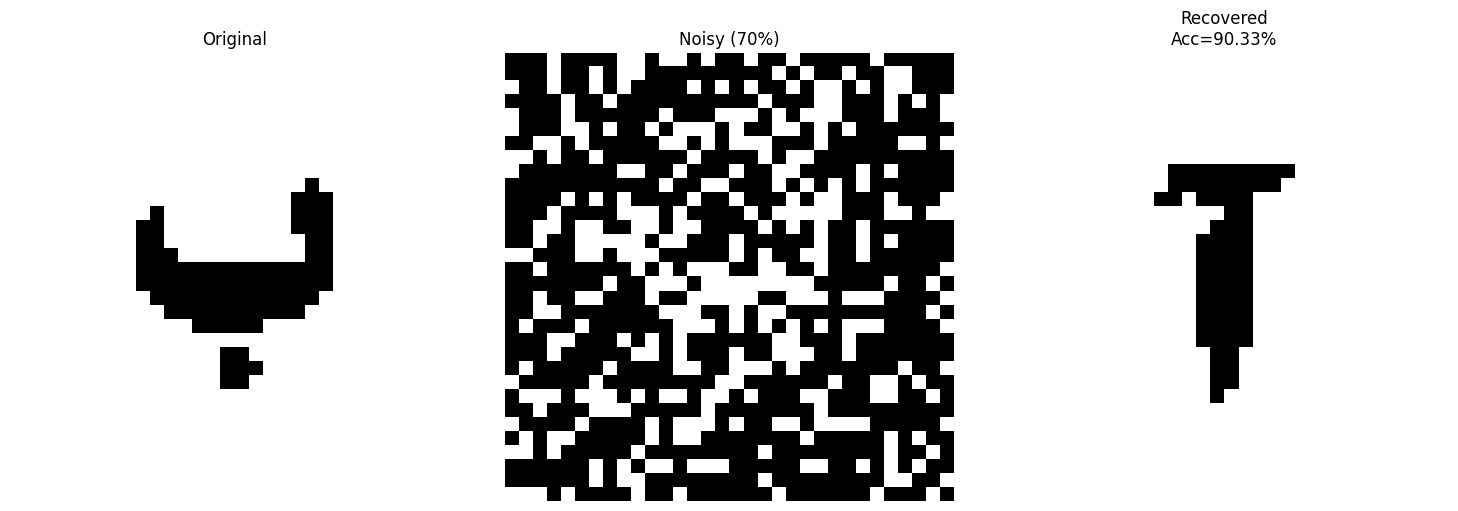

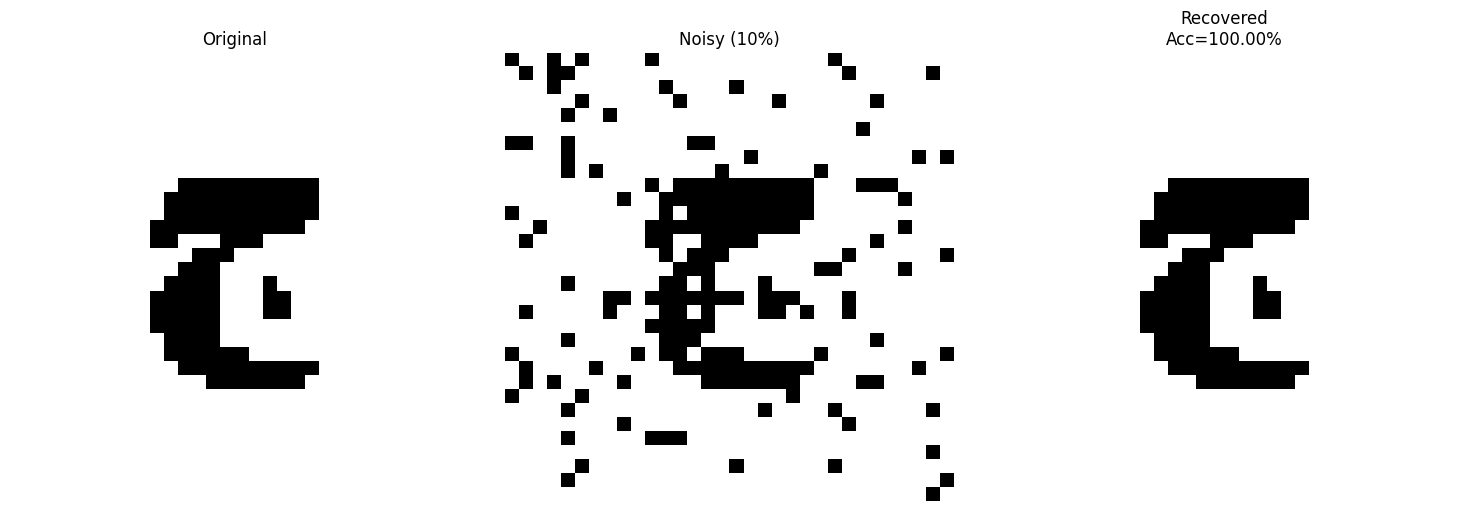

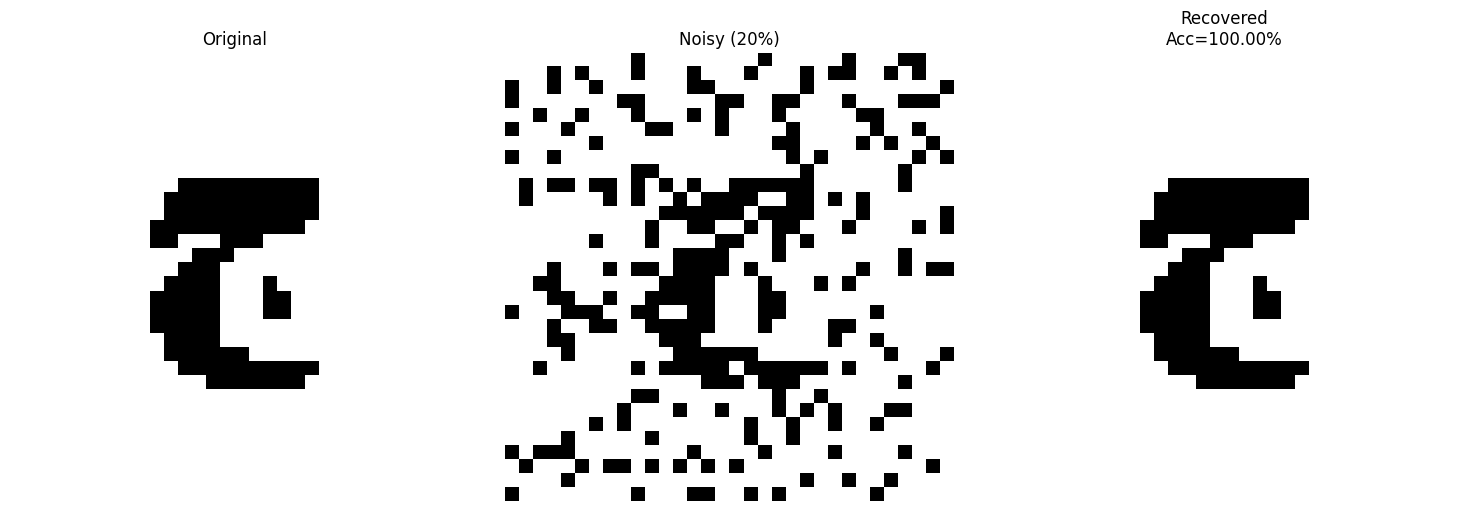

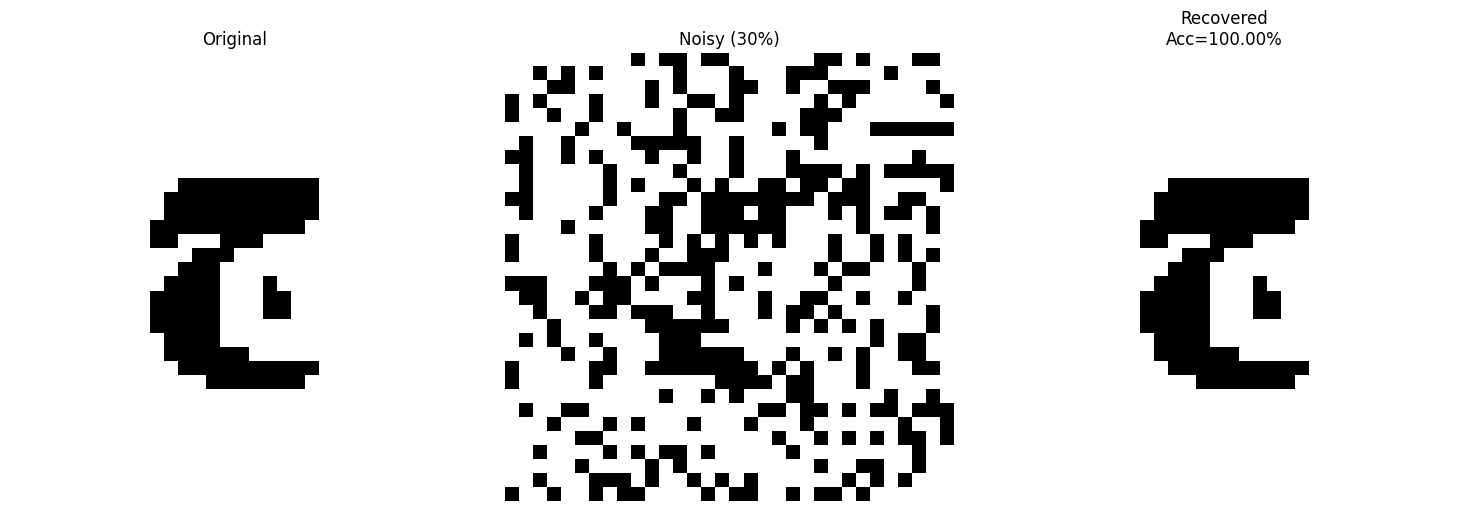

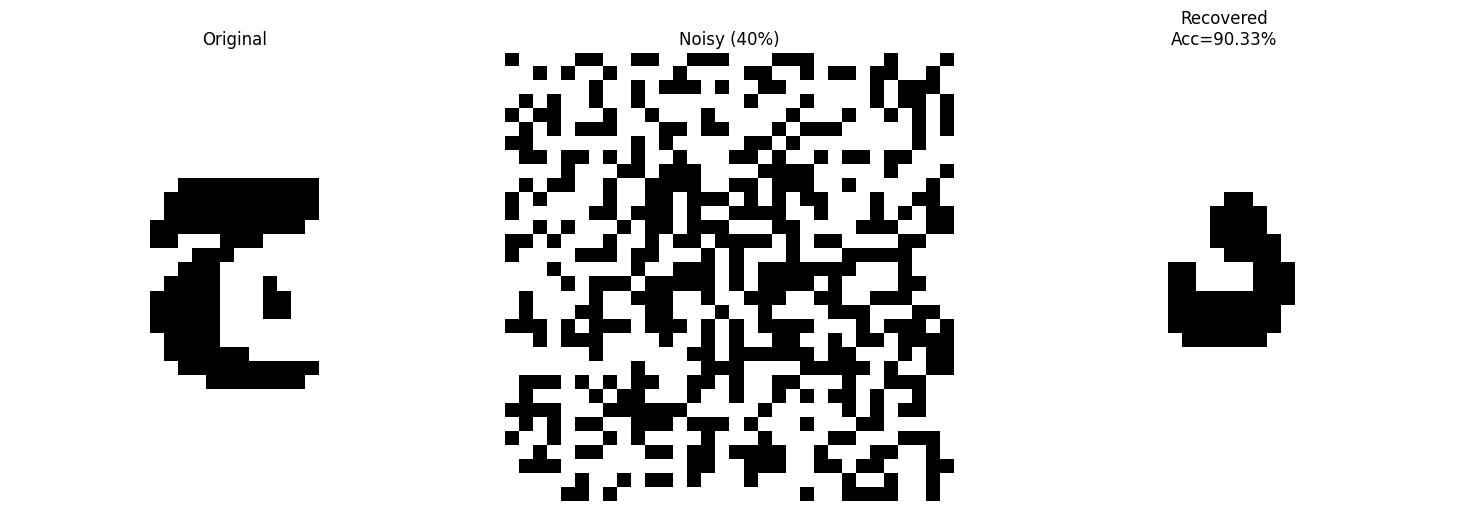

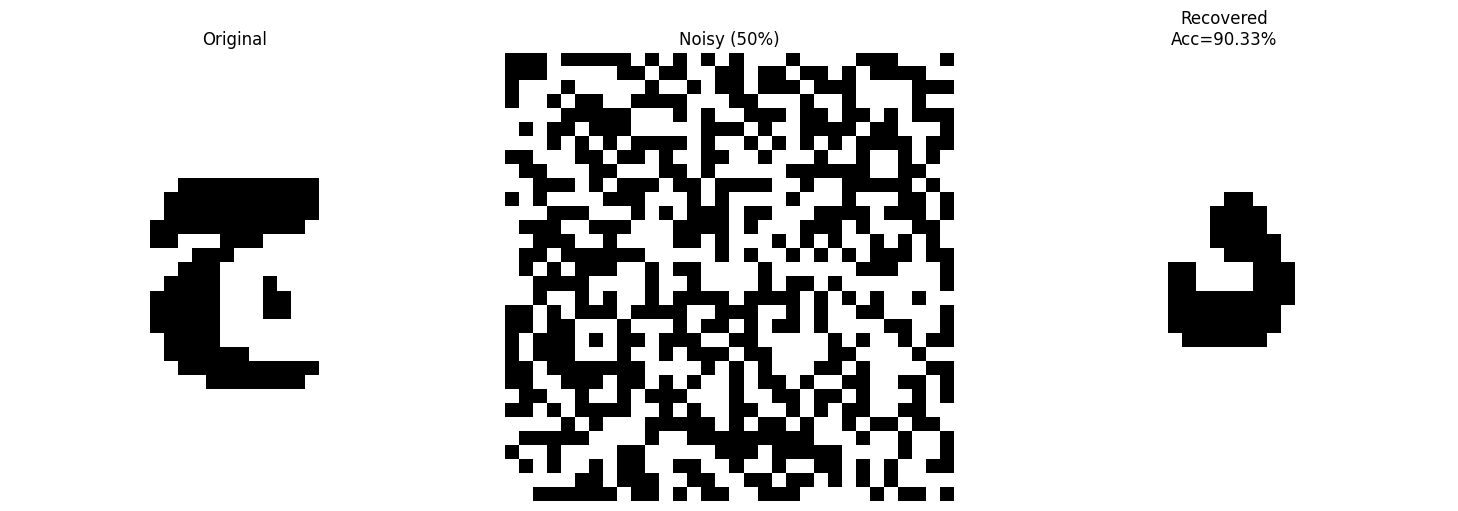

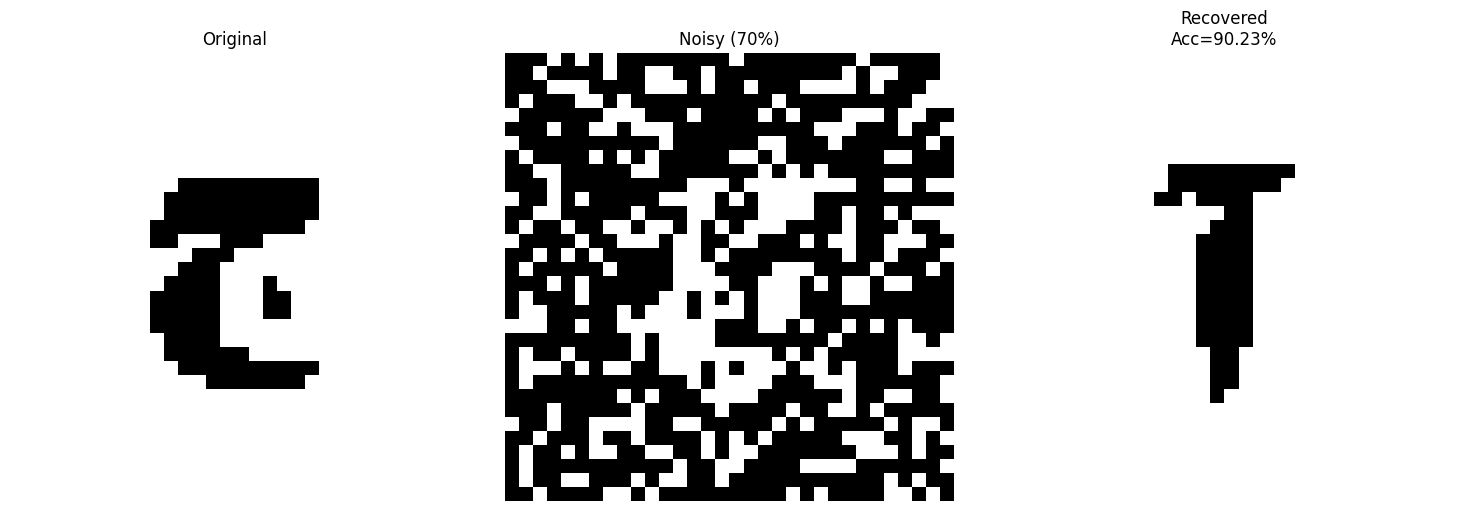

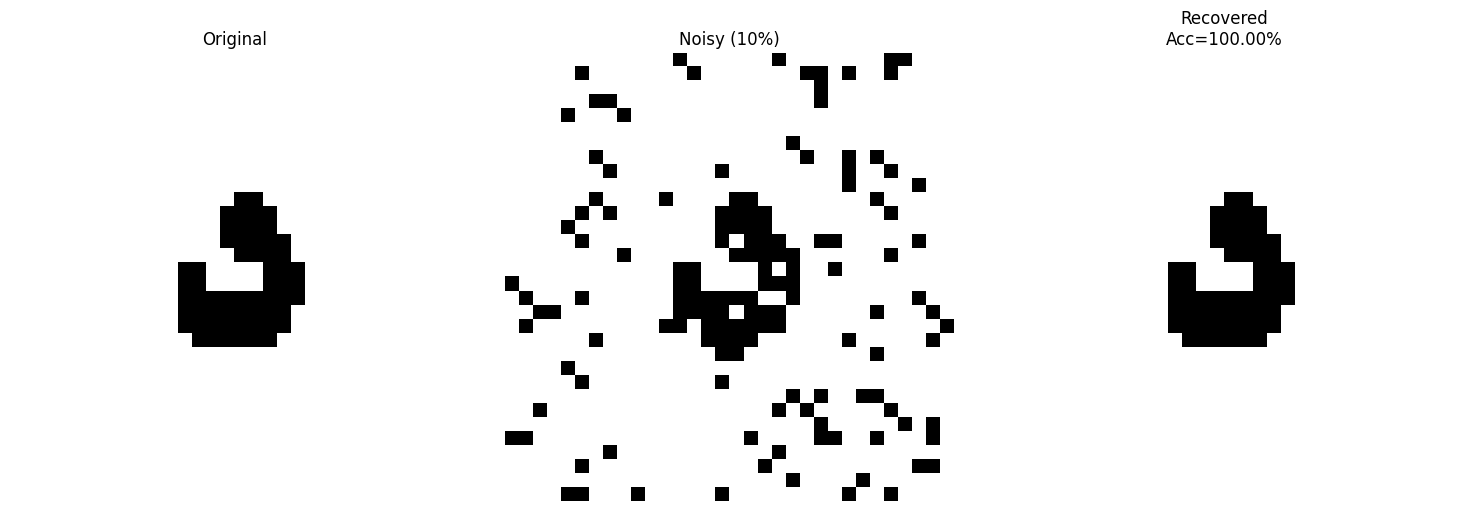

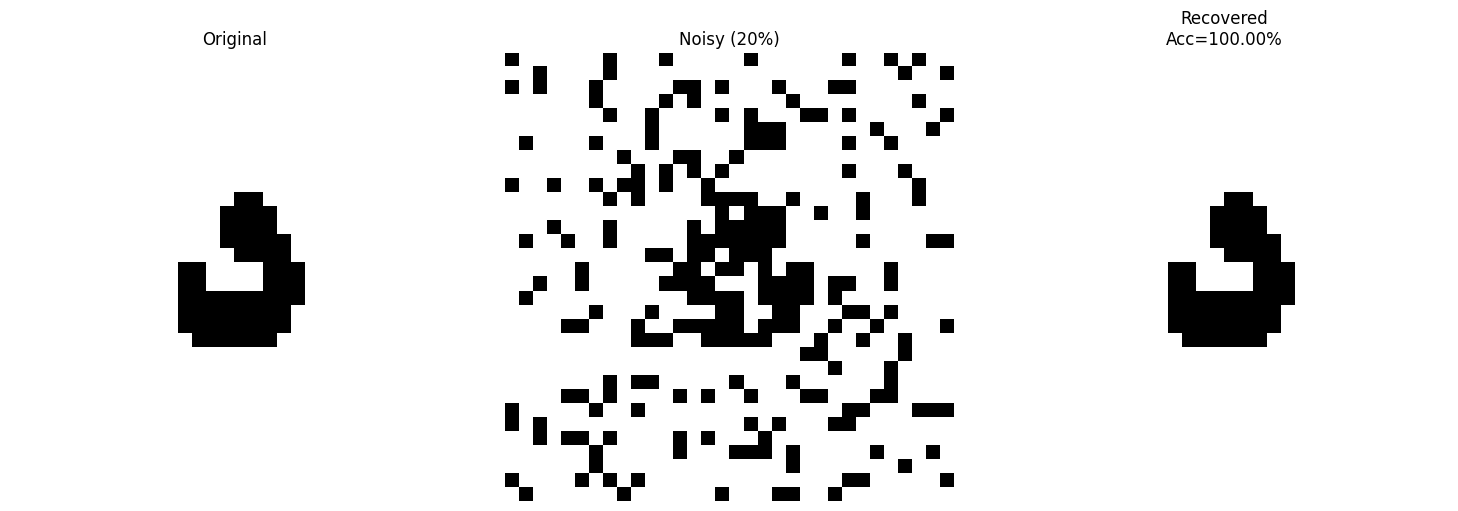

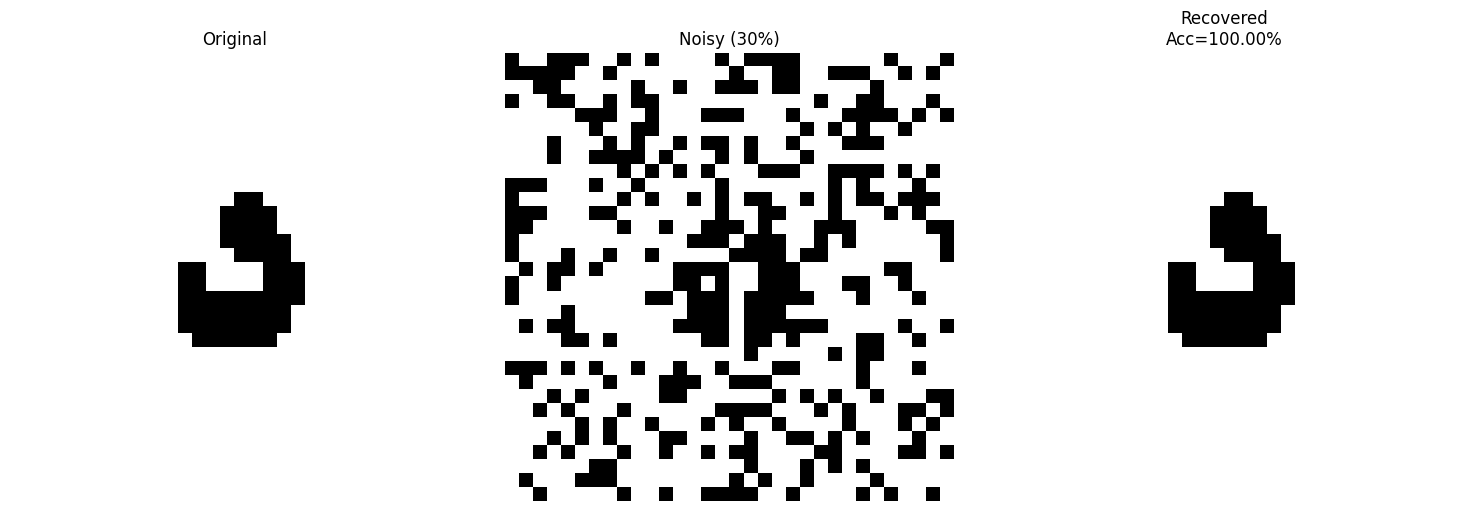

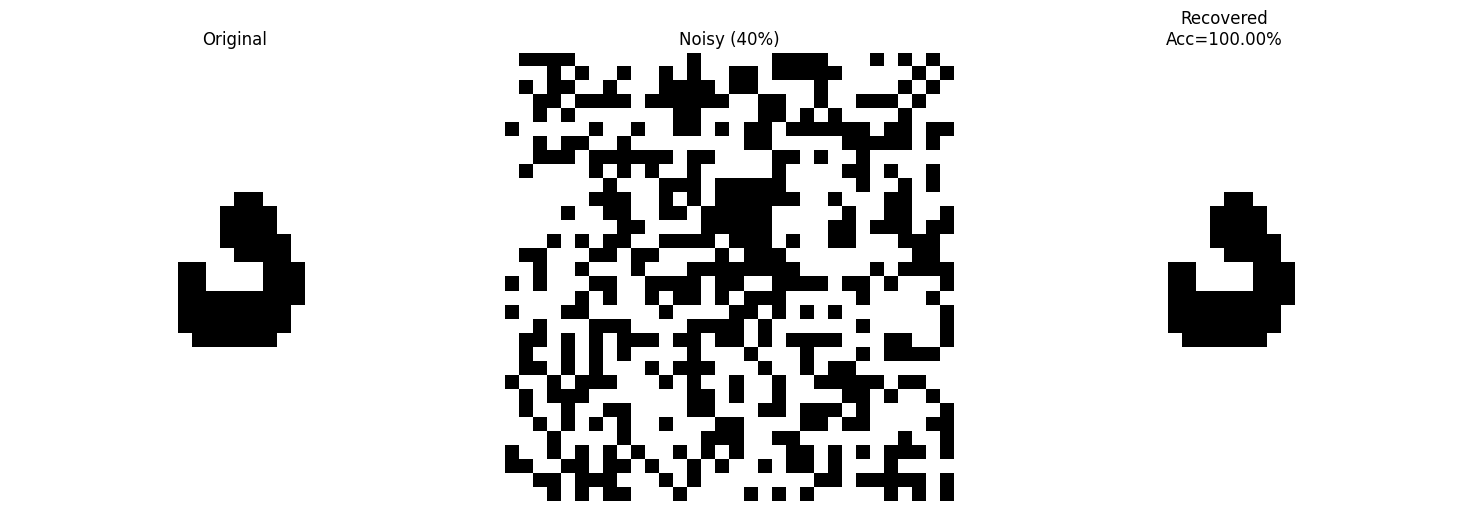

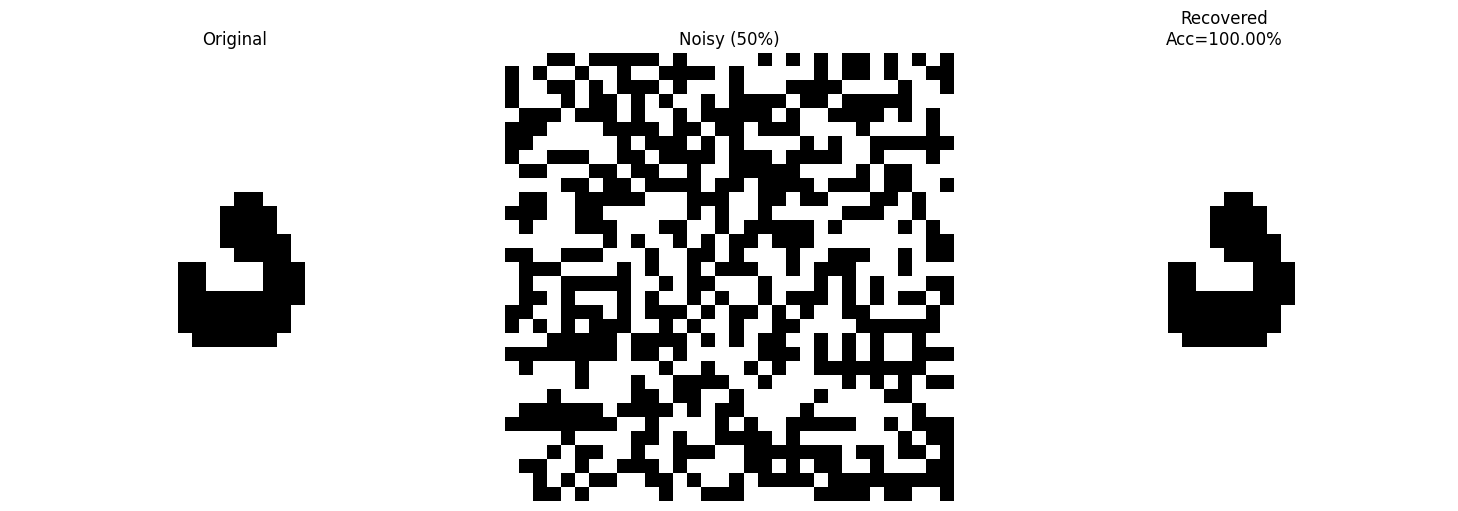

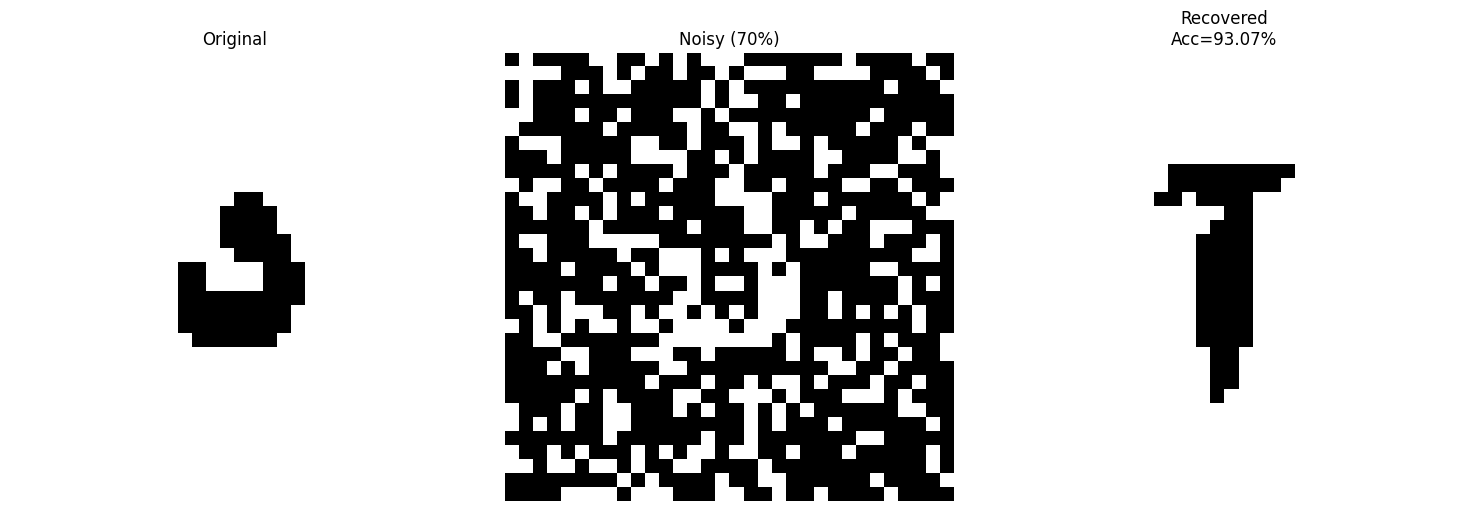

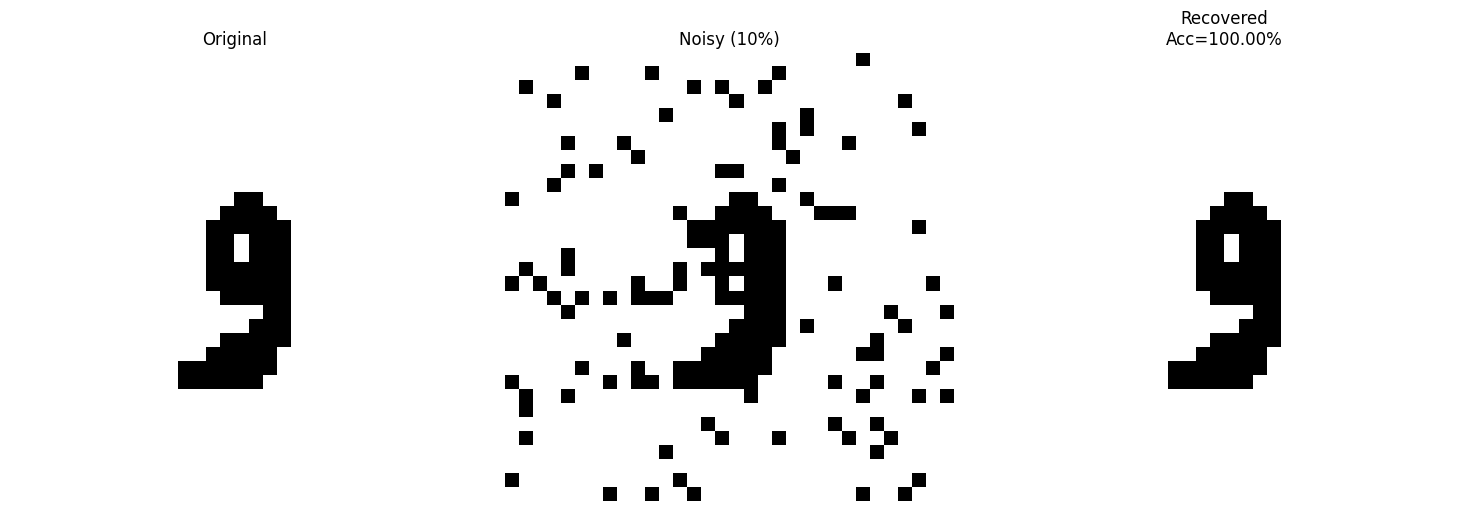

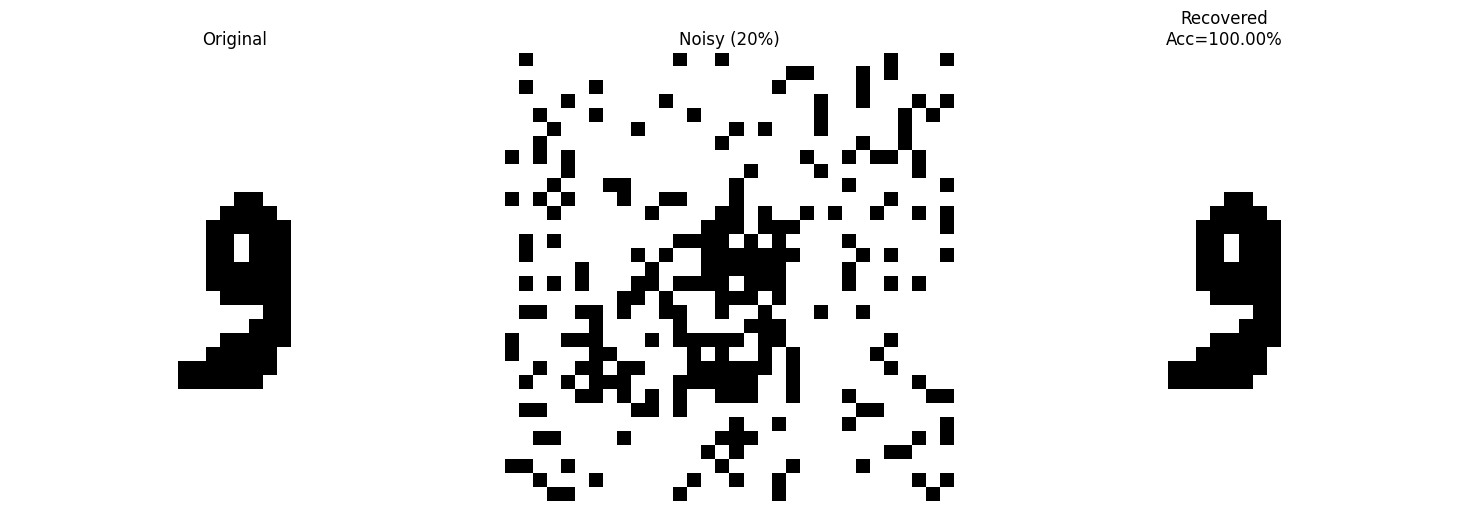

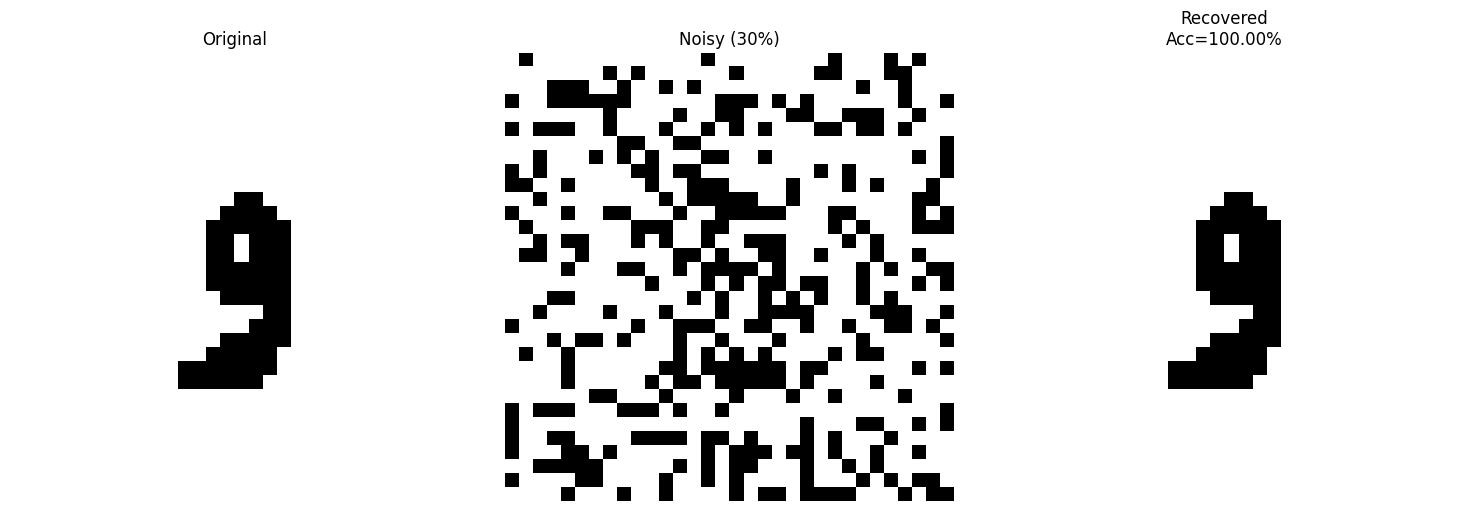

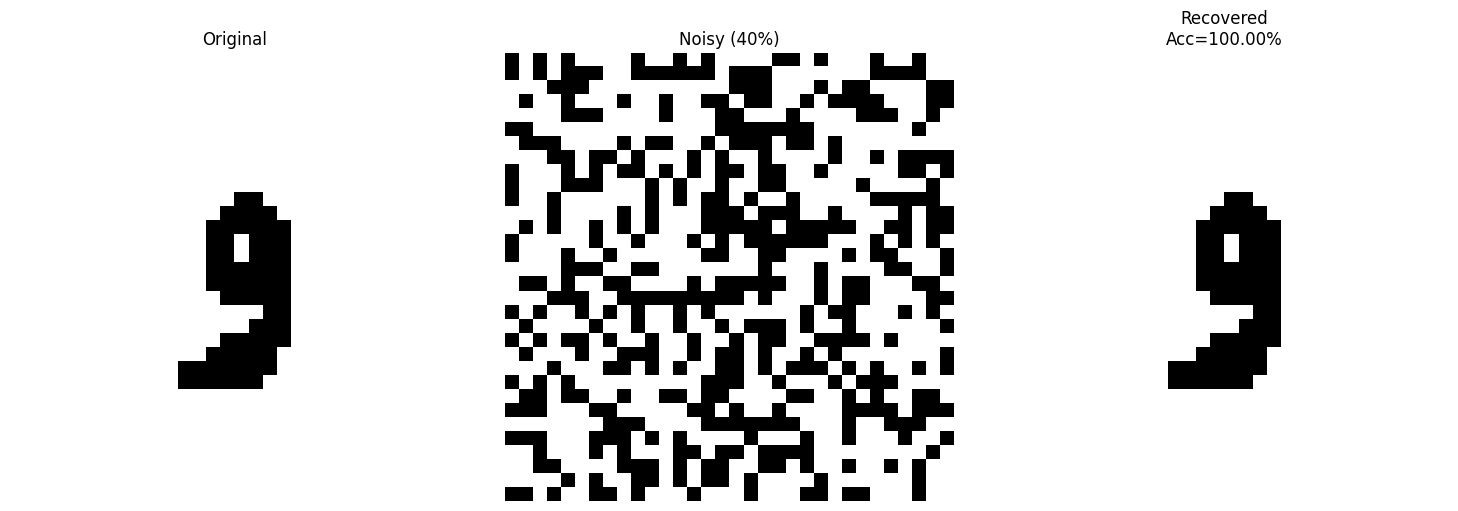

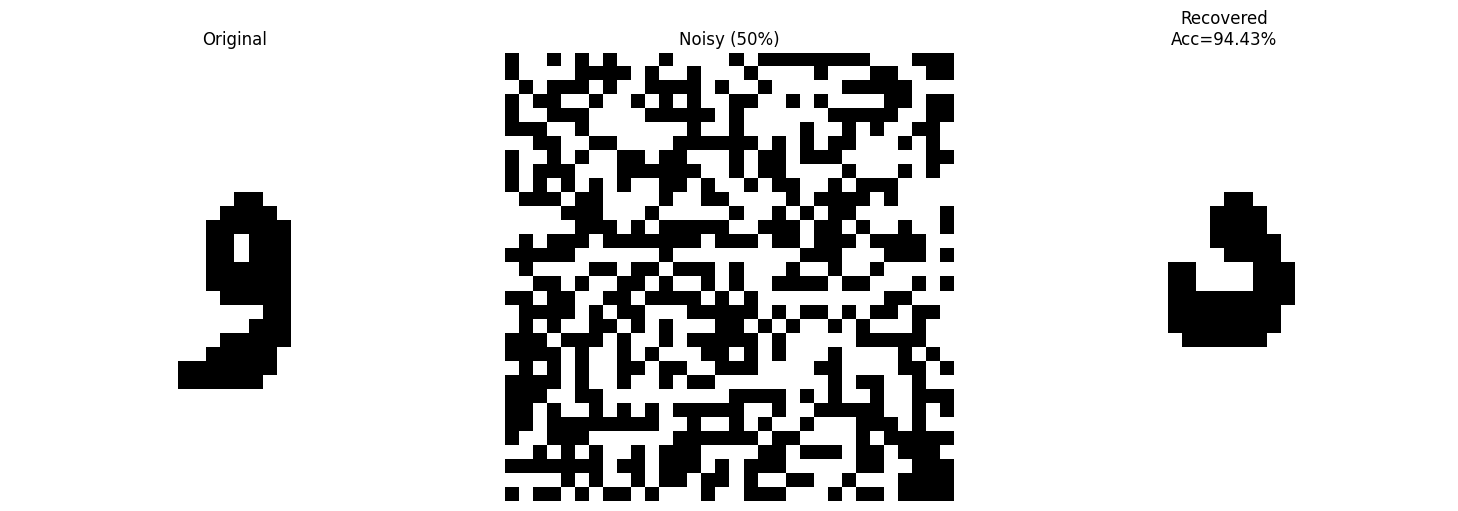

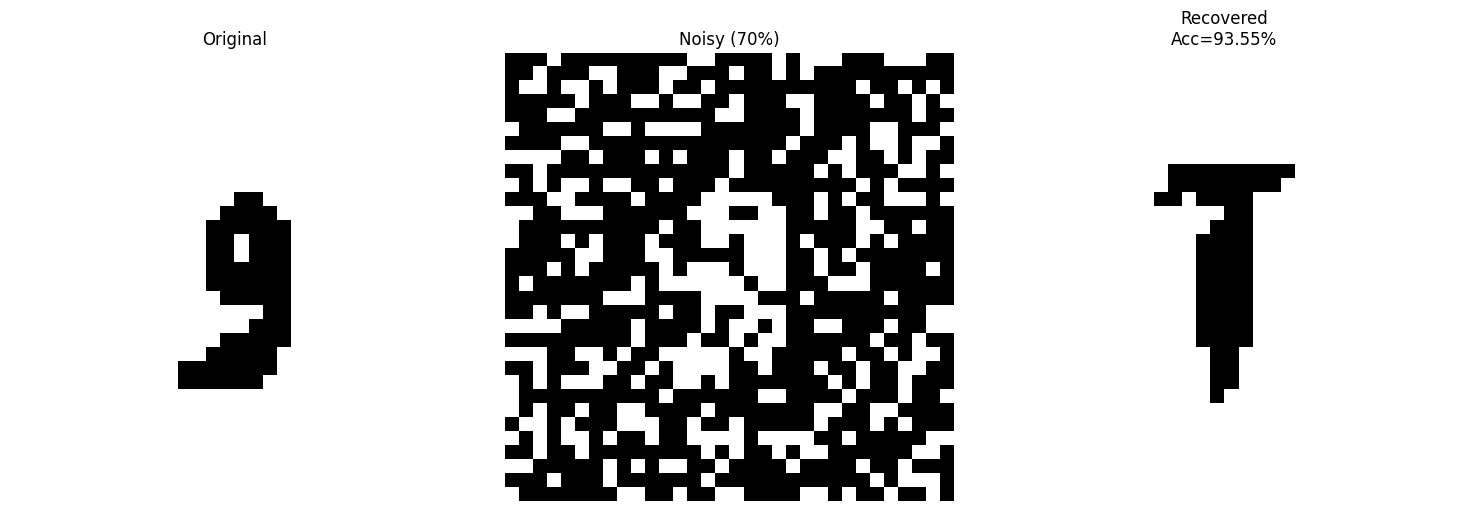

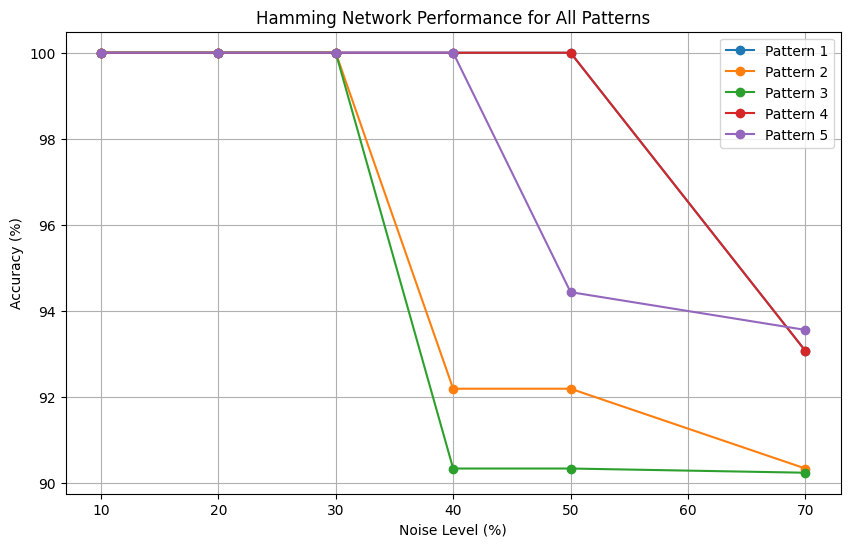

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional
from dataclasses import dataclass
import logging
from pathlib import Path
import csv

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

@dataclass
class ImageData:
    """Data class to store image information"""
    pattern: np.ndarray
    width: int
    height: int
    name: str

class ImageProcessor:
    """Handles image processing operations"""

    @staticmethod
    def convert_to_binary(
        image_path: str,
        target_size: Tuple[int, int] = (32, 32),
        threshold: int = 128
    ) -> ImageData:
        """Convert image to binary pattern."""
        try:
            path = Path(image_path)
            with Image.open(path) as img:
                img = img.convert("L")  # Convert to grayscale
                img = img.resize(target_size)
                image_array = np.array(img)

            binary_image = np.where(image_array > threshold, 1, -1)

            return ImageData(
                pattern=binary_image.flatten(),
                width=target_size[0],
                height=target_size[1],
                name=path.stem
            )
        except Exception as e:
            logger.error(f"Error processing image {image_path}: {str(e)}")
            raise

class NoiseGenerator:
    """Handles noise generation for patterns"""

    @staticmethod
    def add_noise(
        pattern: np.ndarray,
        noise_level: float,
        random_state: Optional[int] = None
    ) -> np.ndarray:
        """Add noise to pattern."""
        if random_state is not None:
            np.random.seed(random_state)

        noisy_pattern = pattern.copy()
        num_pixels = int(noise_level * pattern.size)
        indices = np.random.choice(pattern.size, num_pixels, replace=False)
        noisy_pattern.flat[indices] *= -1

        return noisy_pattern

class HammingNetwork:
    """Improved Hamming Network implementation"""

    def __init__(self, patterns: np.ndarray):
        """Initialize Hamming Network."""
        self.patterns = patterns
        self.num_patterns, self.size = patterns.shape
        self.weights = self._train()
        logger.info(f"Initialized network with {self.num_patterns} patterns")

    def _train(self) -> np.ndarray:
        """Train network weights"""
        return self.patterns / 2 + 0.5

    def recall(
        self,
        input_pattern: np.ndarray,
        return_similarity: bool = False
    ) -> Tuple[np.ndarray, Optional[float]]:
        """Recall pattern from network."""
        normalized_pattern = input_pattern / 2 + 0.5
        similarity = np.dot(self.weights, normalized_pattern)
        max_index = np.argmax(similarity)

        if return_similarity:
            return self.patterns[max_index], similarity[max_index]
        return self.patterns[max_index], None

def main(
    image_paths: List[str],
    target_size: Tuple[int, int] = (32, 32),
    noise_levels: Optional[List[float]] = None,
    csv_output_path: str = "results.csv"
):
    """Main function to run Hamming Network demonstration"""

    if noise_levels is None:
        noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7] # 10%, 20%, ..., 60%

    # Load and process images
    try:
        image_data = [
            ImageProcessor.convert_to_binary(path, target_size)
            for path in image_paths
        ]
        patterns = np.array([img.pattern for img in image_data])
        pattern_names = [img.name for img in image_data]
        logger.info(f"Loaded {len(patterns)} patterns")
    except Exception as e:
        logger.error(f"Failed to load patterns: {str(e)}")
        return

    # Initialize network
    network = HammingNetwork(patterns)
    noise_gen = NoiseGenerator()

    # Test network performance
    accuracies = []
    results = [["Pattern", "Noise Level (%)", "Accuracy"]]

    for i, original_pattern in enumerate(patterns):
        pattern_accuracies = []
        for noise_level in noise_levels:
            # Add noise and recover pattern
            noisy_pattern = noise_gen.add_noise(original_pattern, noise_level)
            recovered_pattern, _ = network.recall(noisy_pattern)

            # Calculate accuracy
            accuracy = np.mean(recovered_pattern == original_pattern) * 100
            pattern_accuracies.append(accuracy)

            # Save result to CSV
            results.append([pattern_names[i], int(noise_level * 100), accuracy])

            # Visualize results (Original, Noisy, Recovered)
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            axs[0].imshow(original_pattern.reshape(target_size), cmap="gray")
            axs[0].set_title("Original")
            axs[0].axis("off")
            axs[1].imshow(noisy_pattern.reshape(target_size), cmap="gray")
            axs[1].set_title(f"Noisy ({int(noise_level * 100)}%)")
            axs[1].axis("off")
            axs[2].imshow(recovered_pattern.reshape(target_size), cmap="gray")
            axs[2].set_title(f"Recovered\nAcc={accuracy:.2f}%")
            axs[2].axis("off")
            plt.tight_layout()
            plt.show()

        accuracies.append(pattern_accuracies)

    # Save results to CSV
    with open(csv_output_path, mode="w", newline='') as f:
        writer = csv.writer(f)
        writer.writerows(results)
    logger.info(f"Results saved to {csv_output_path}")

    # Plot all accuracies in one chart
    plt.figure(figsize=(10, 6))
    for i, pattern_acc in enumerate(accuracies):
        plt.plot(
            [int(n * 100) for n in noise_levels],
            pattern_acc,
            marker='o',
            label=f"Pattern {pattern_names[i]}"
        )
    plt.title("Hamming Network Performance for All Patterns")
    plt.xlabel("Noise Level (%)")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Example usage
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]
    main(image_paths)


# **Part 2**

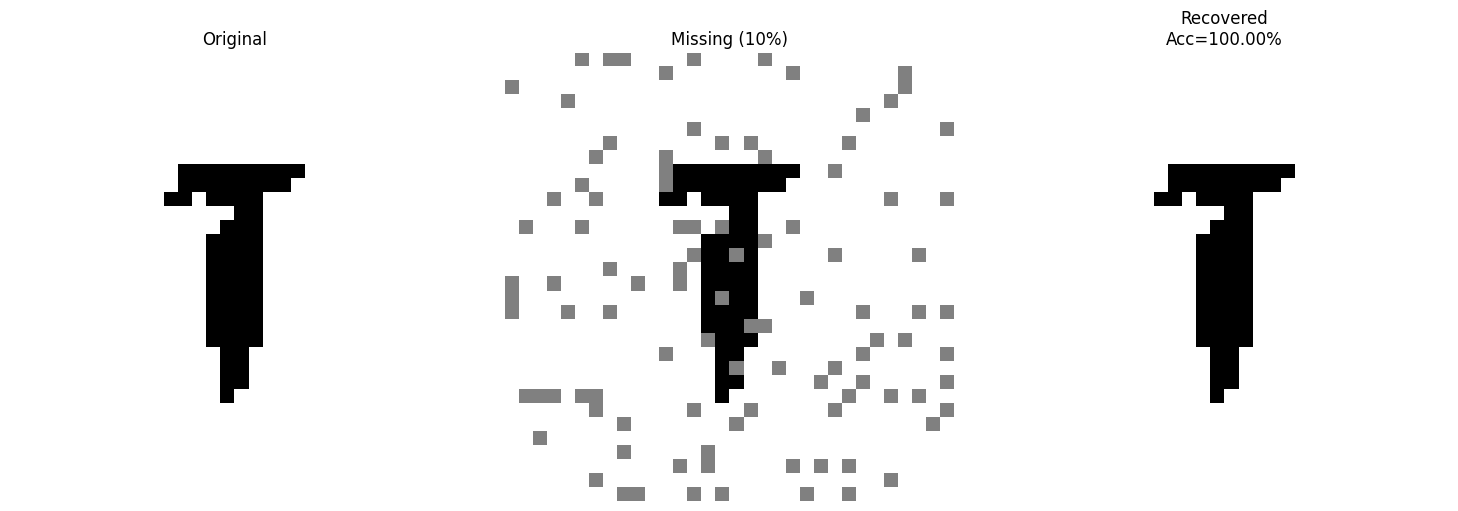

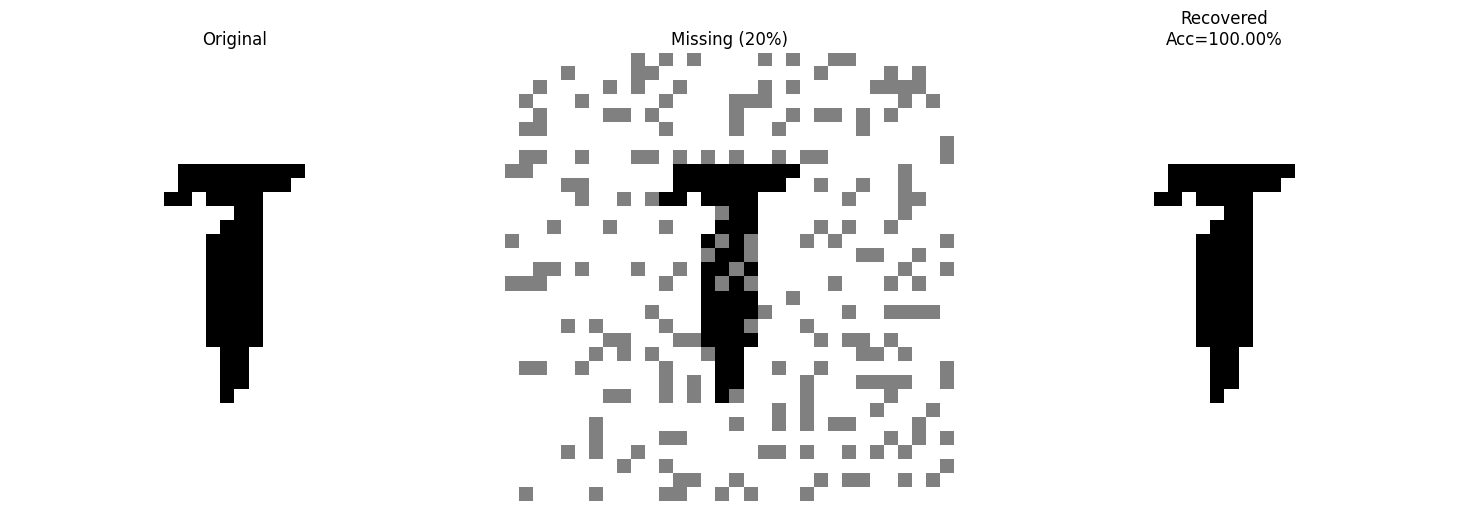

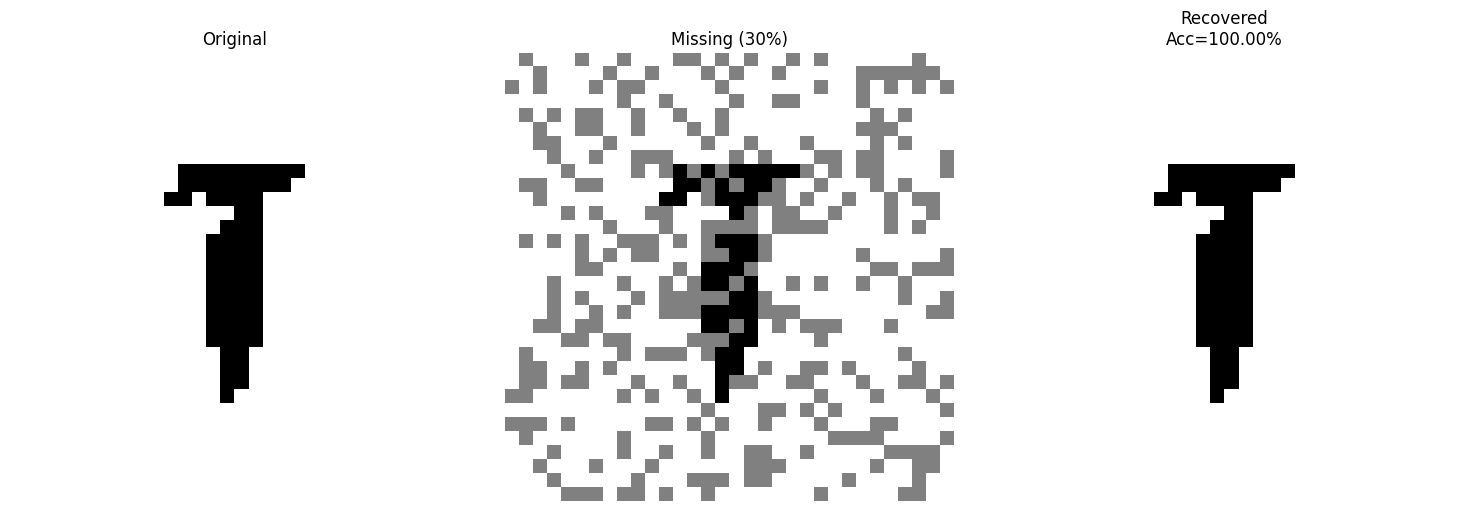

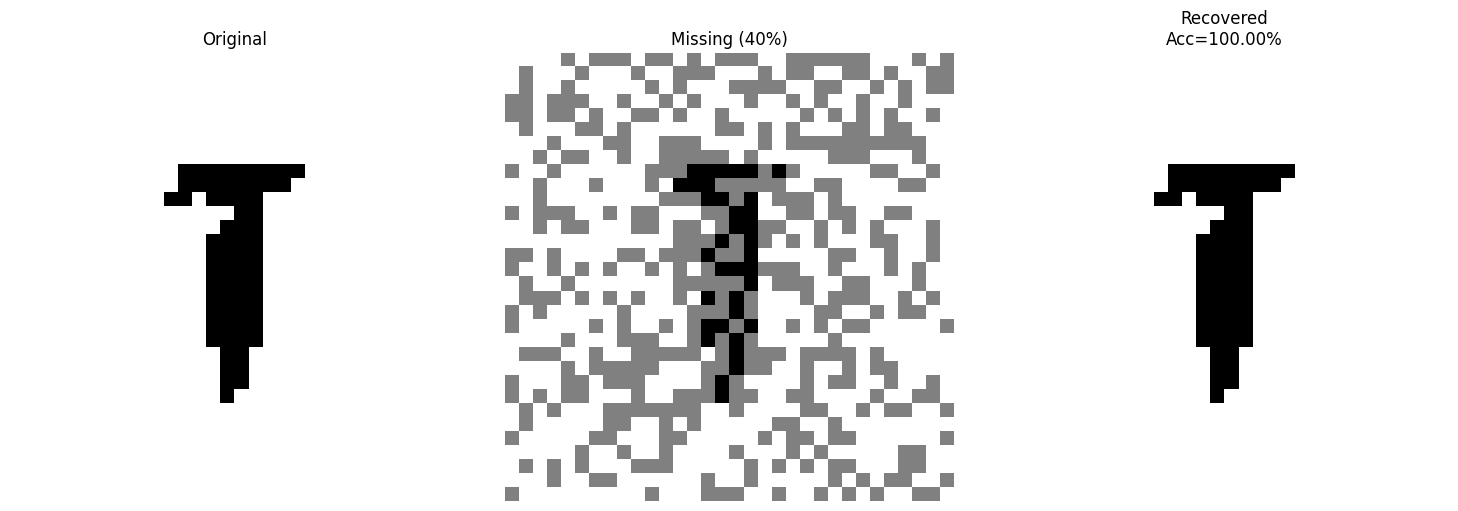

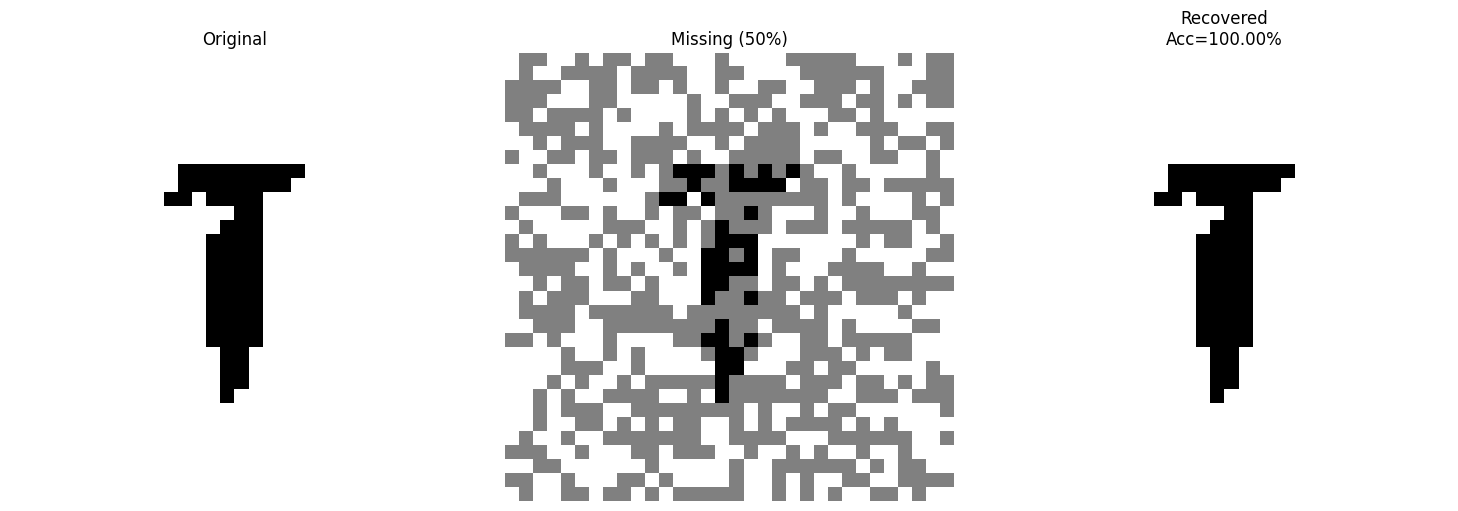

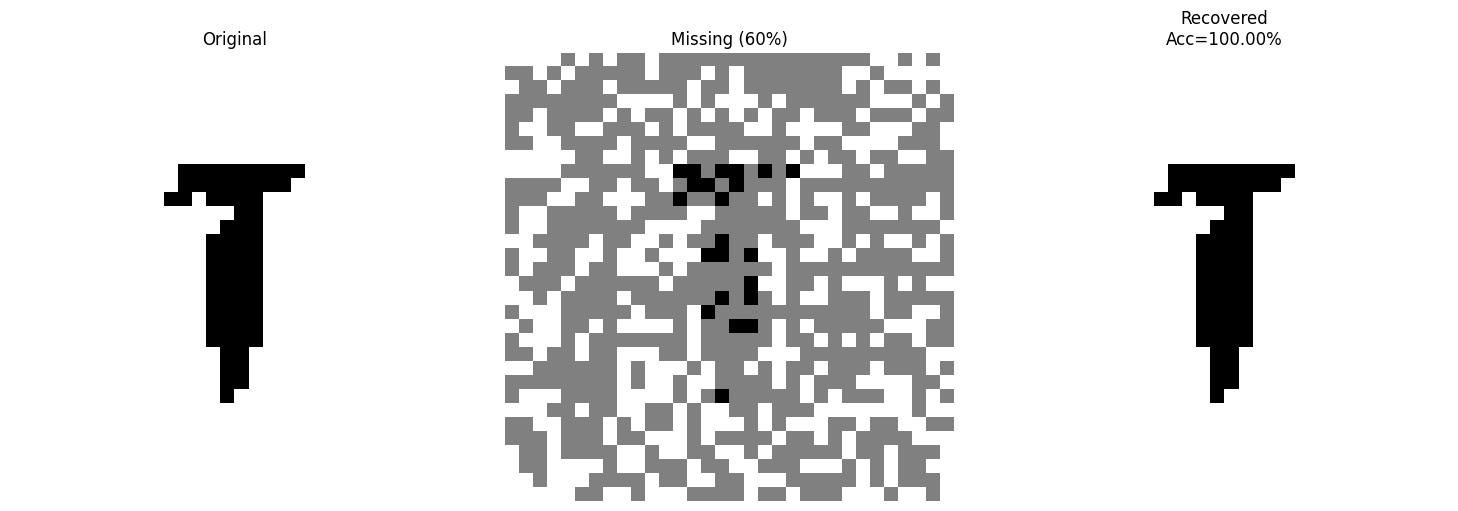

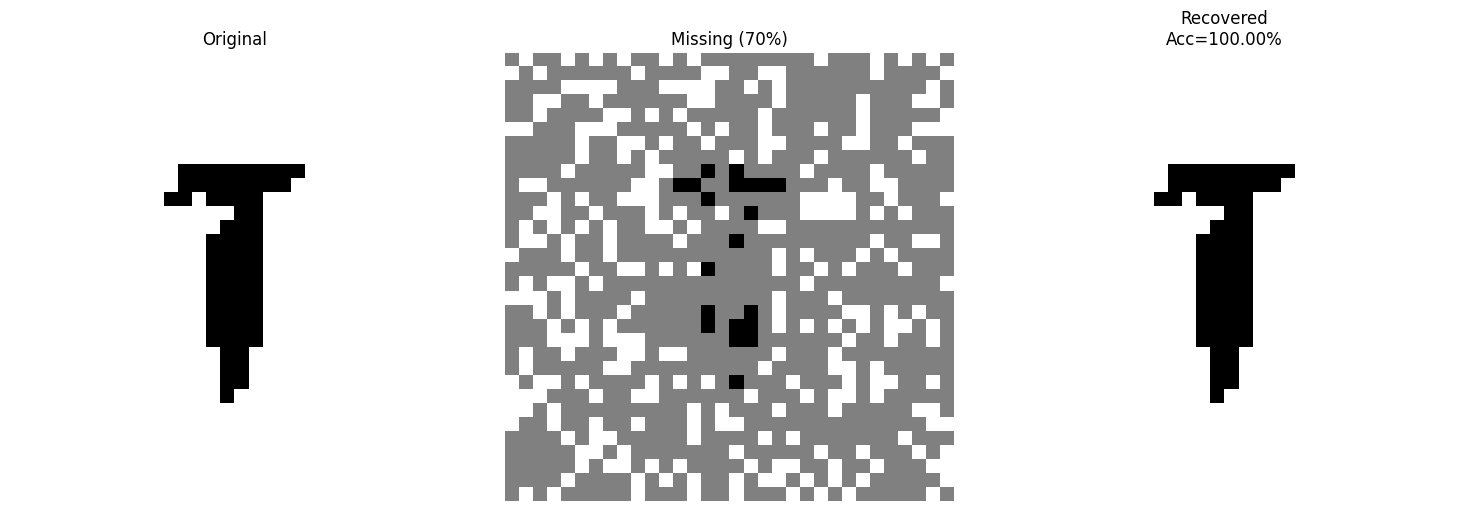

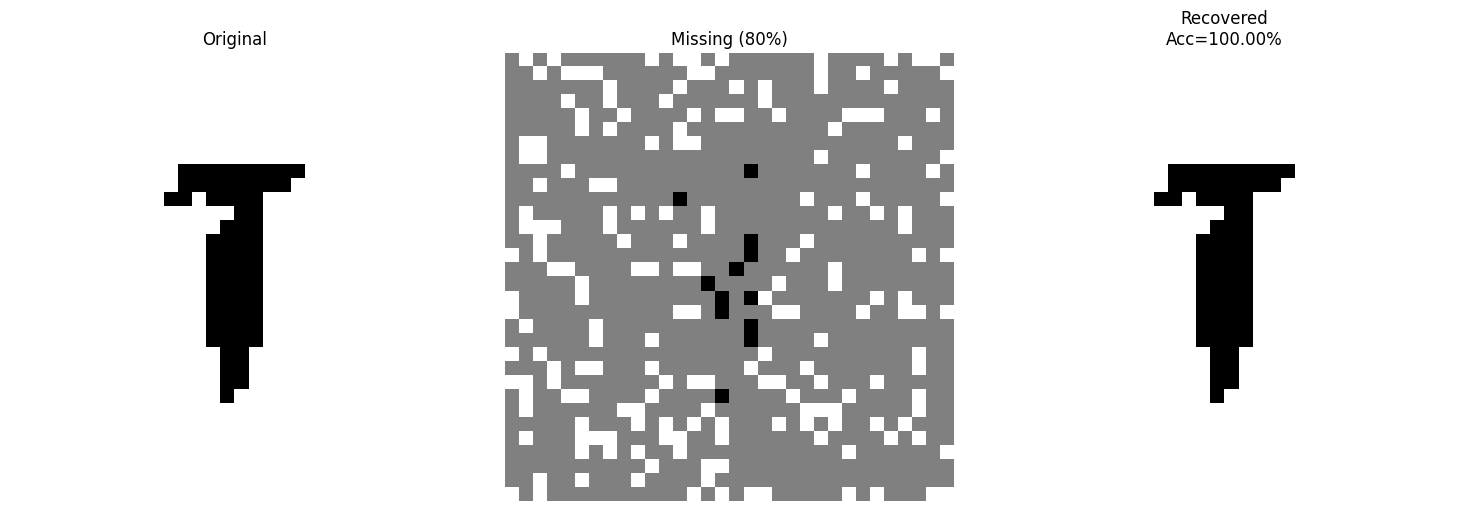

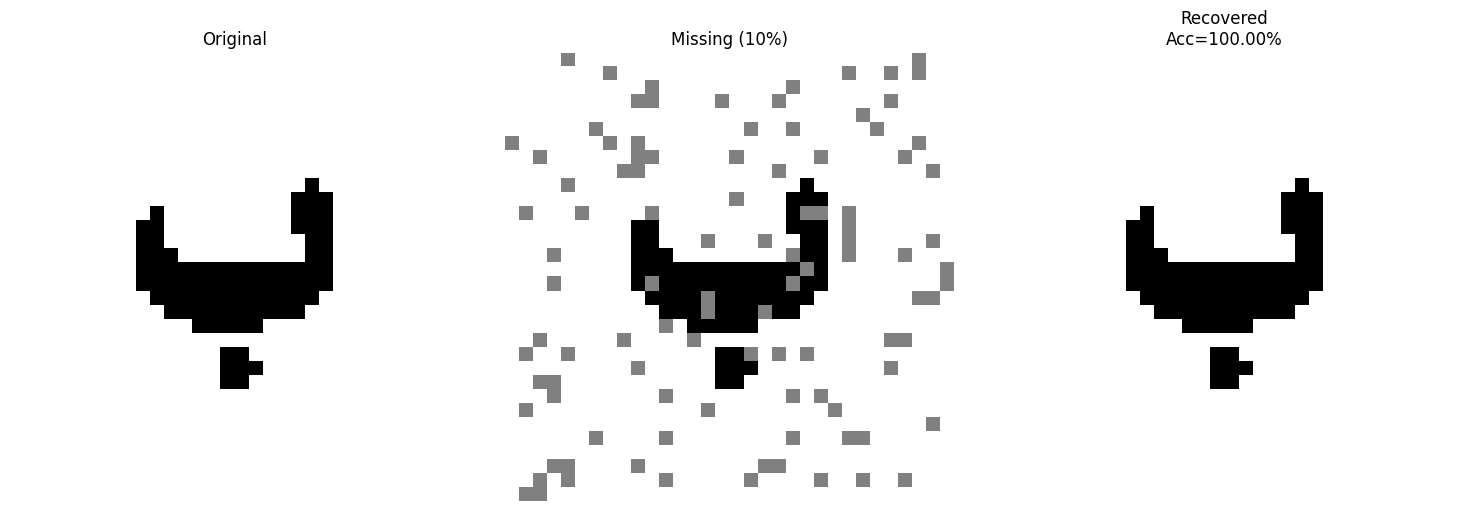

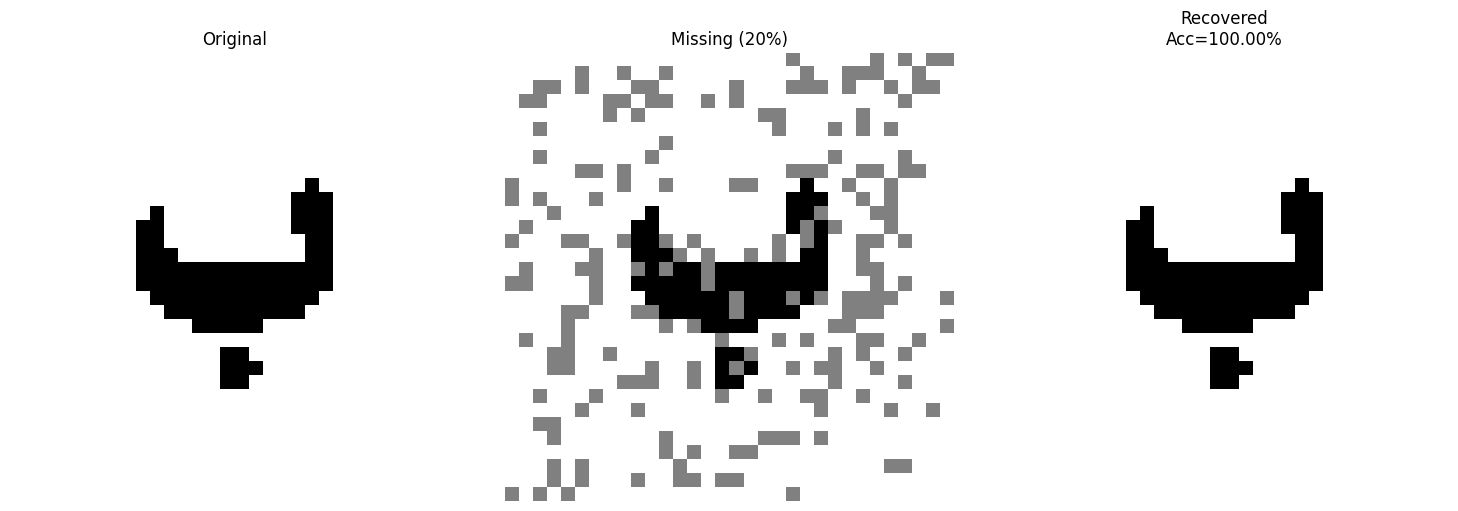

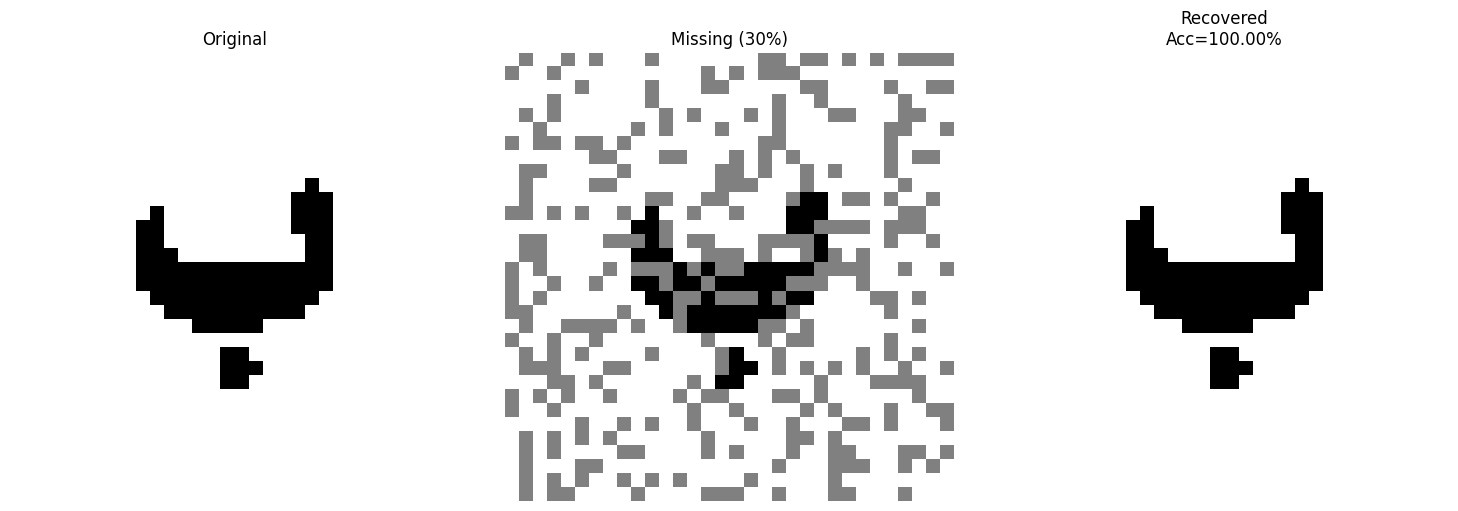

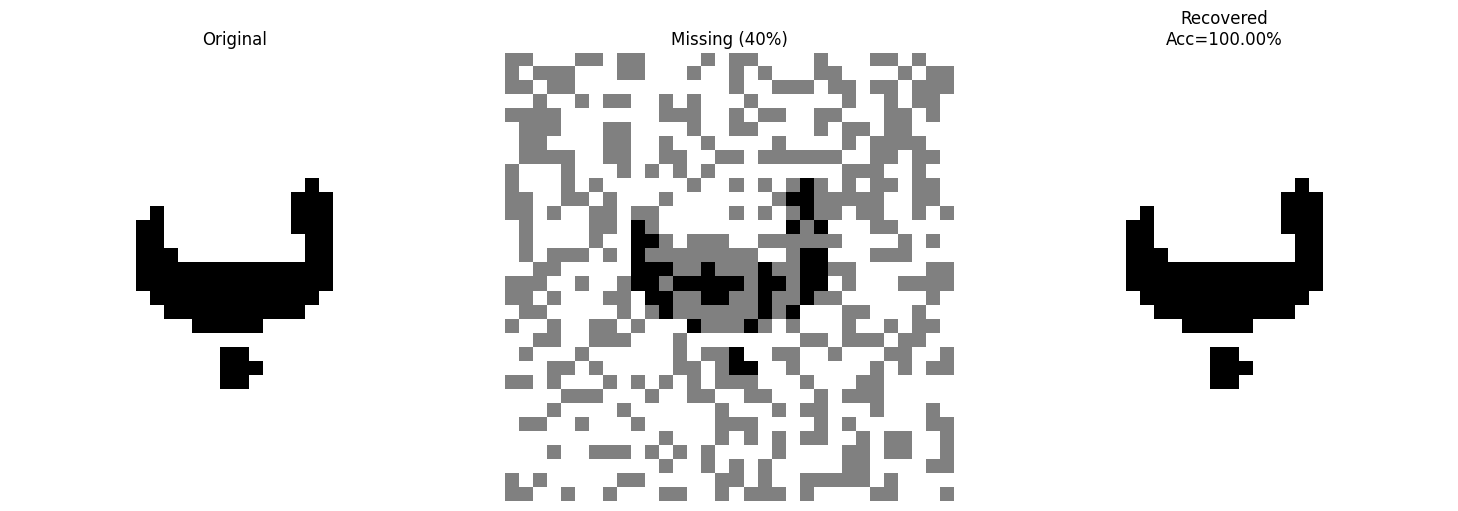

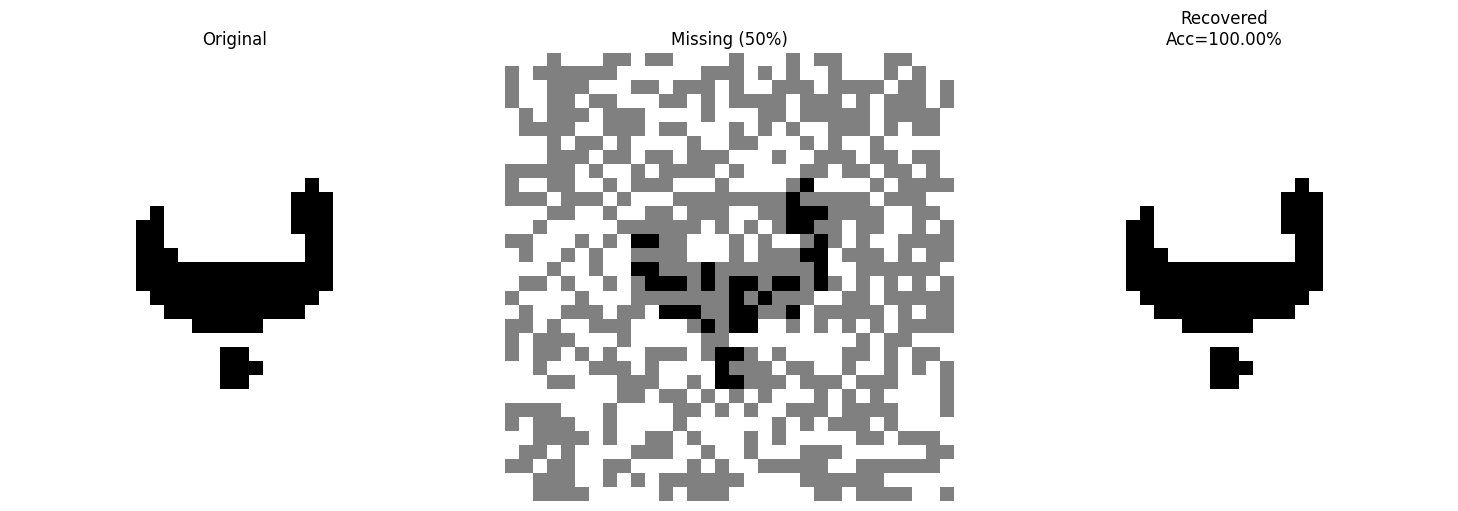

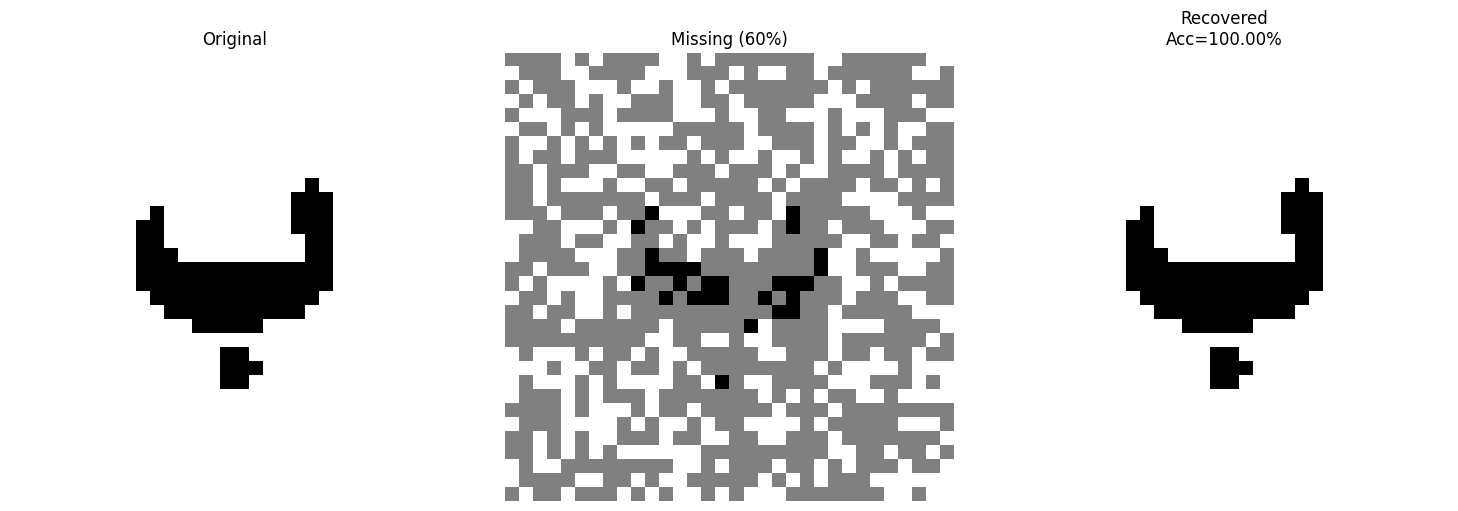

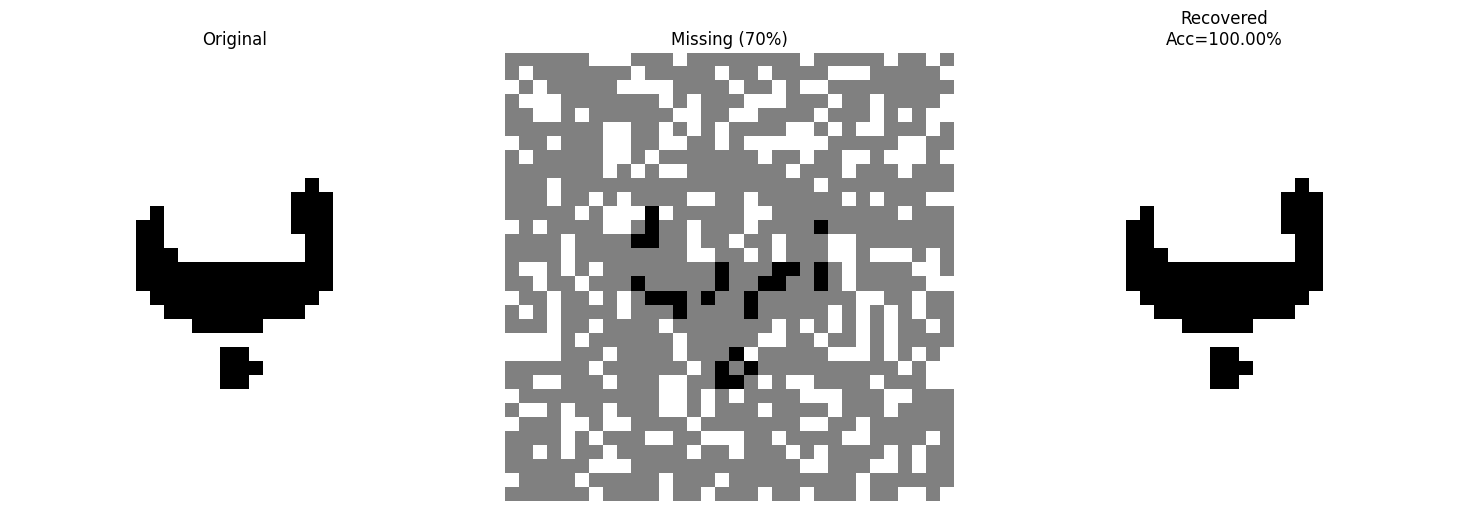

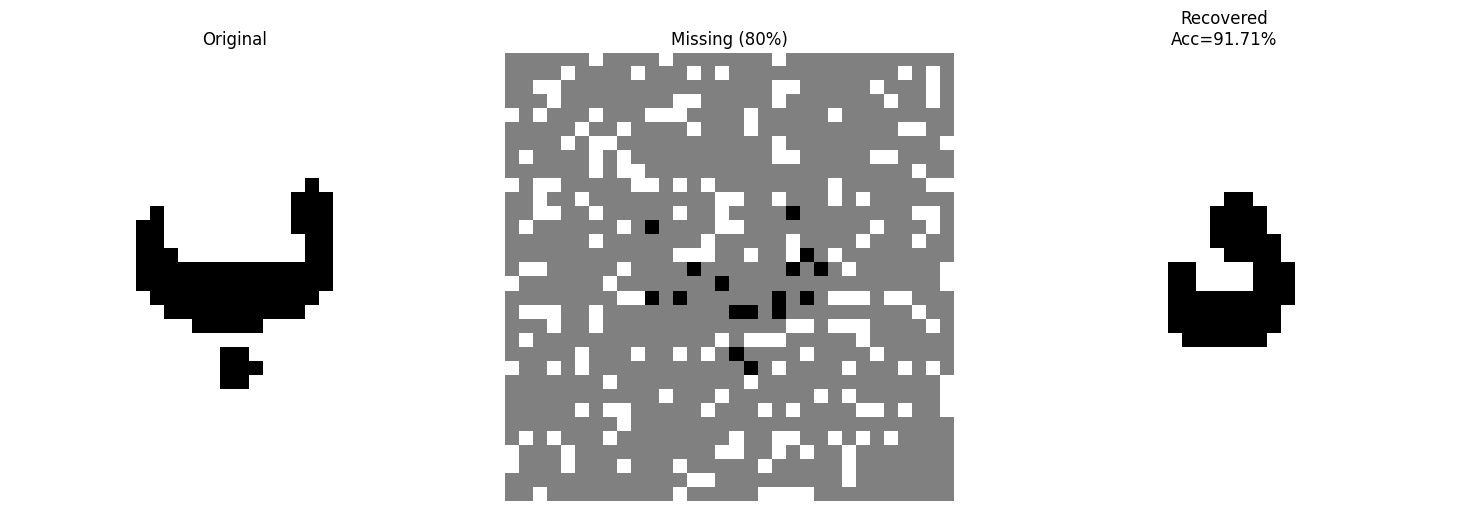

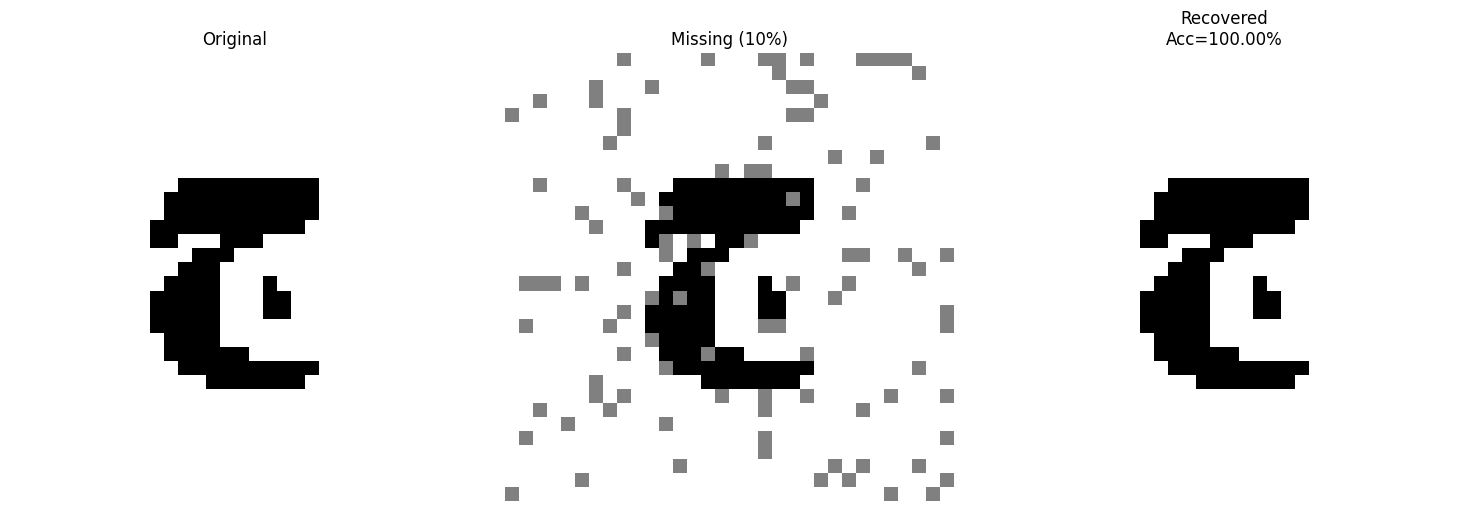

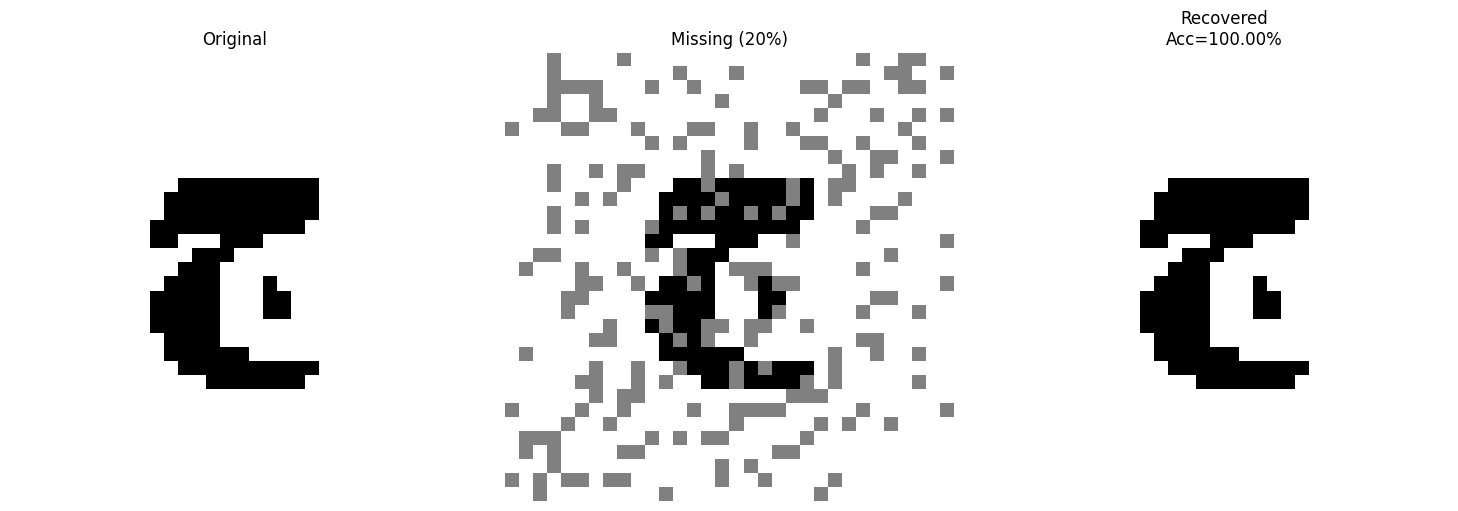

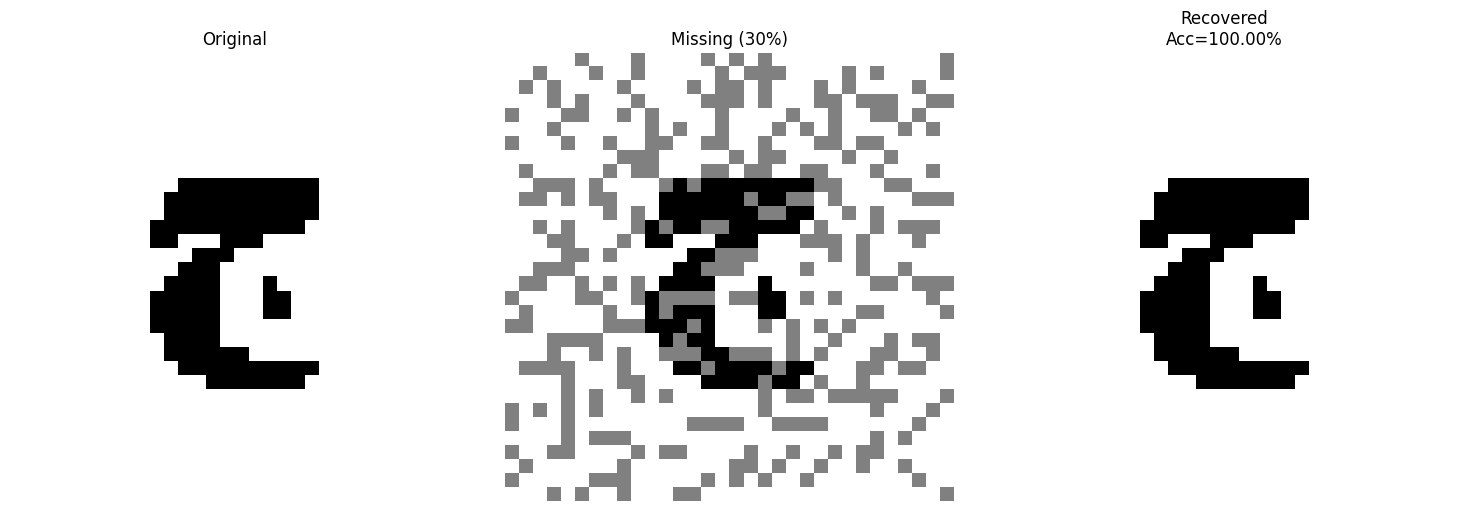

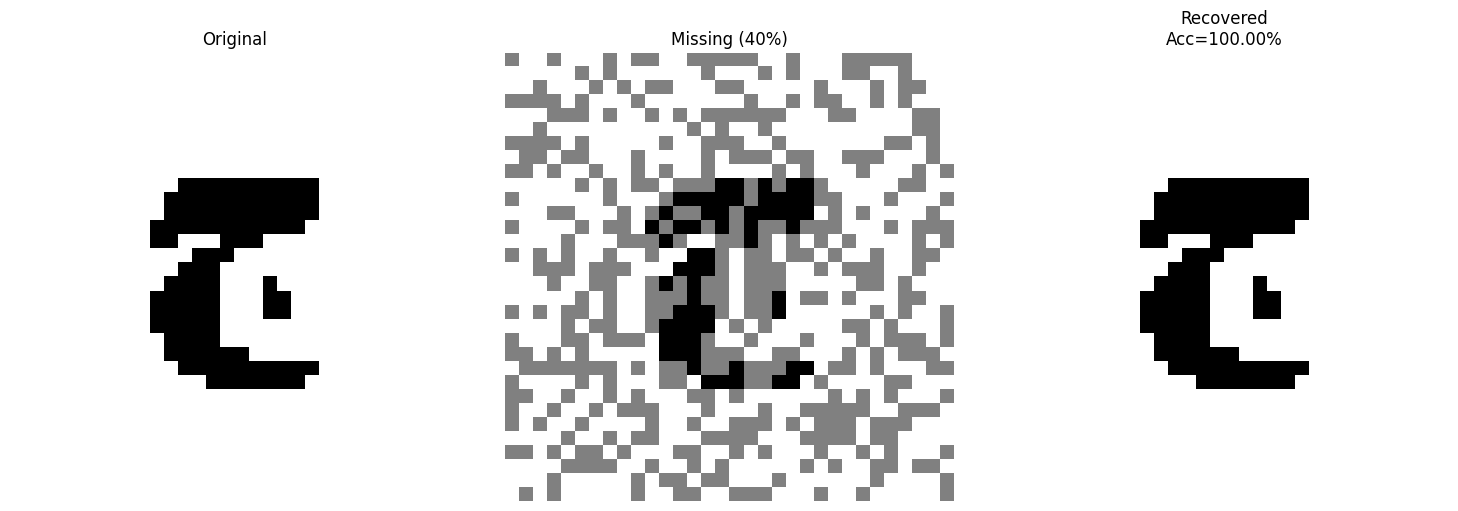

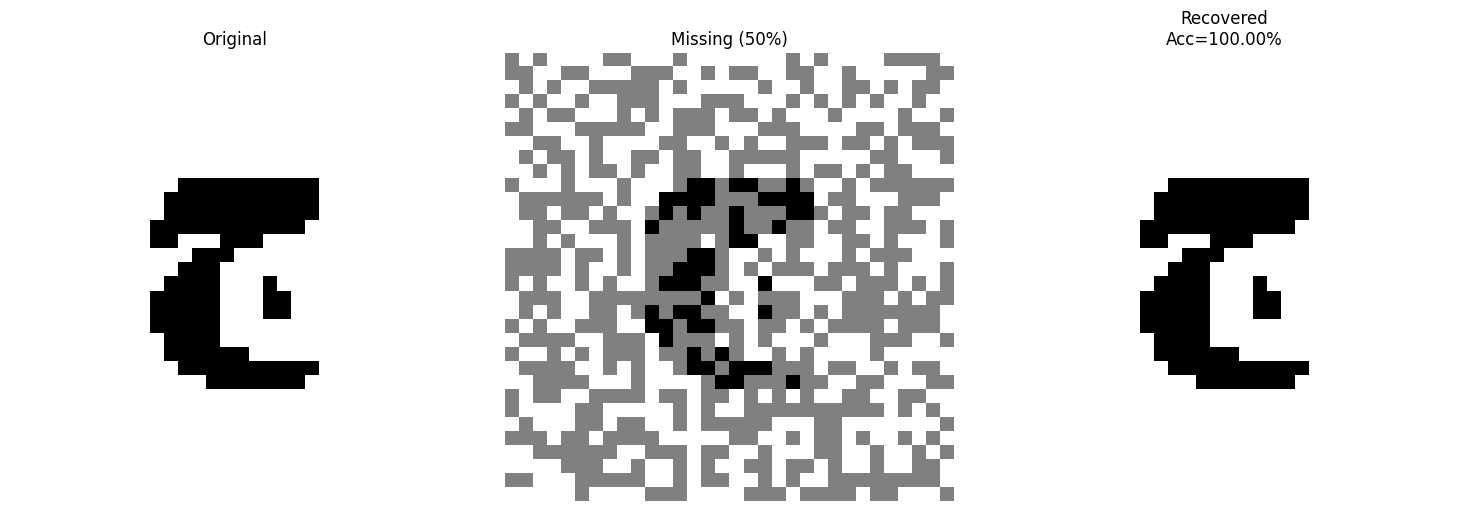

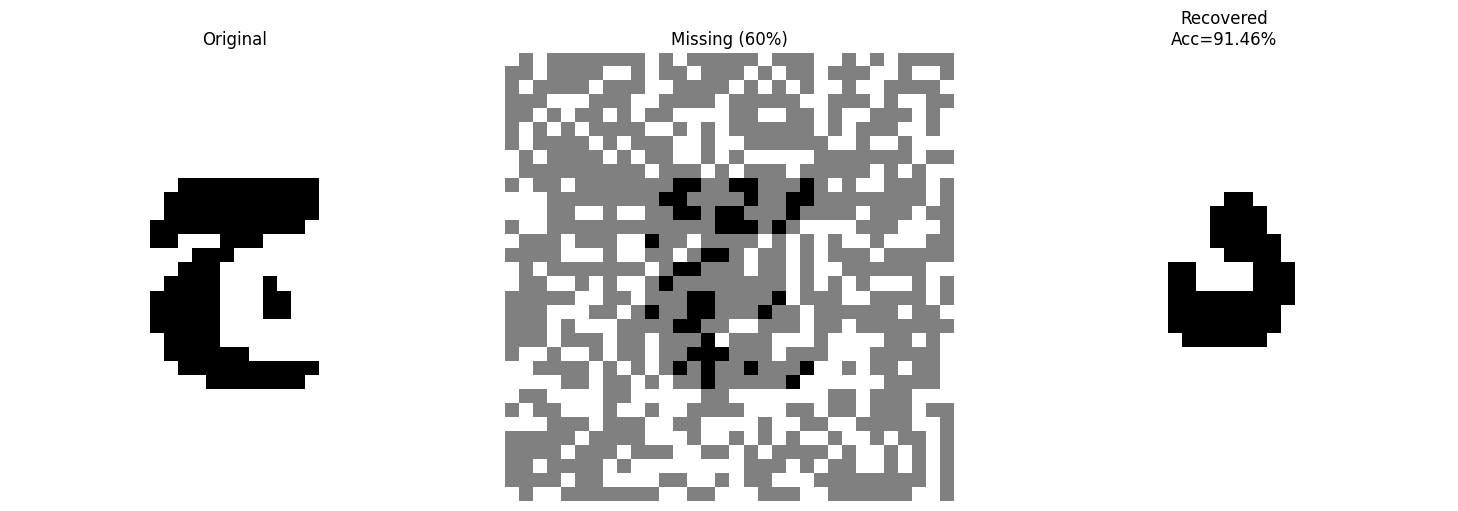

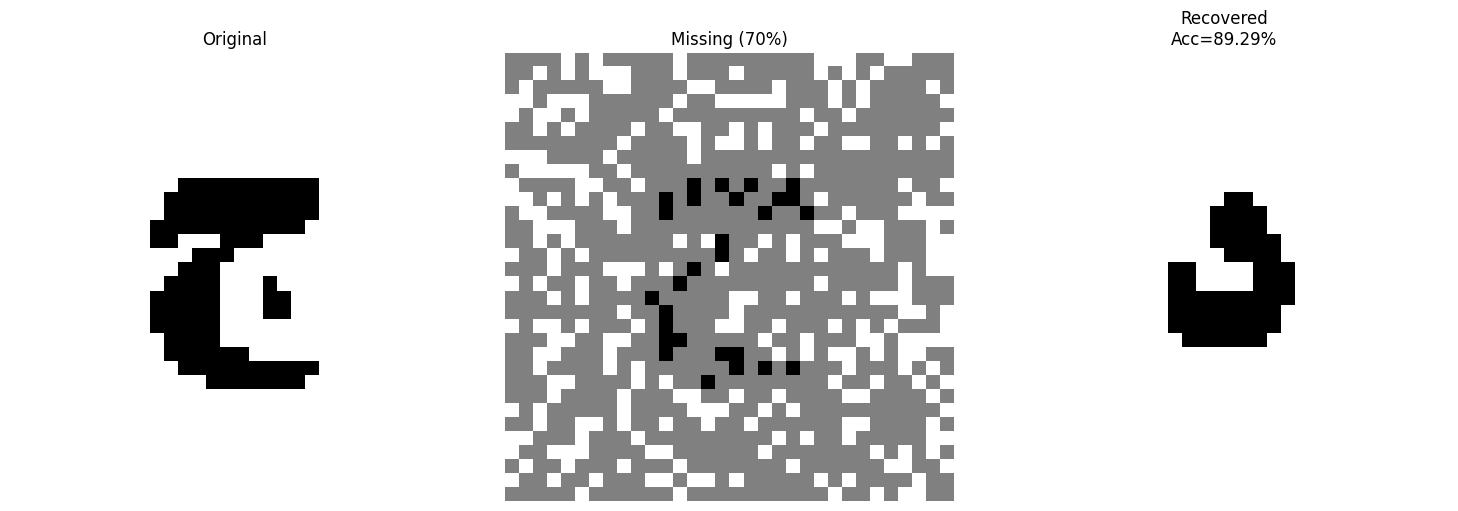

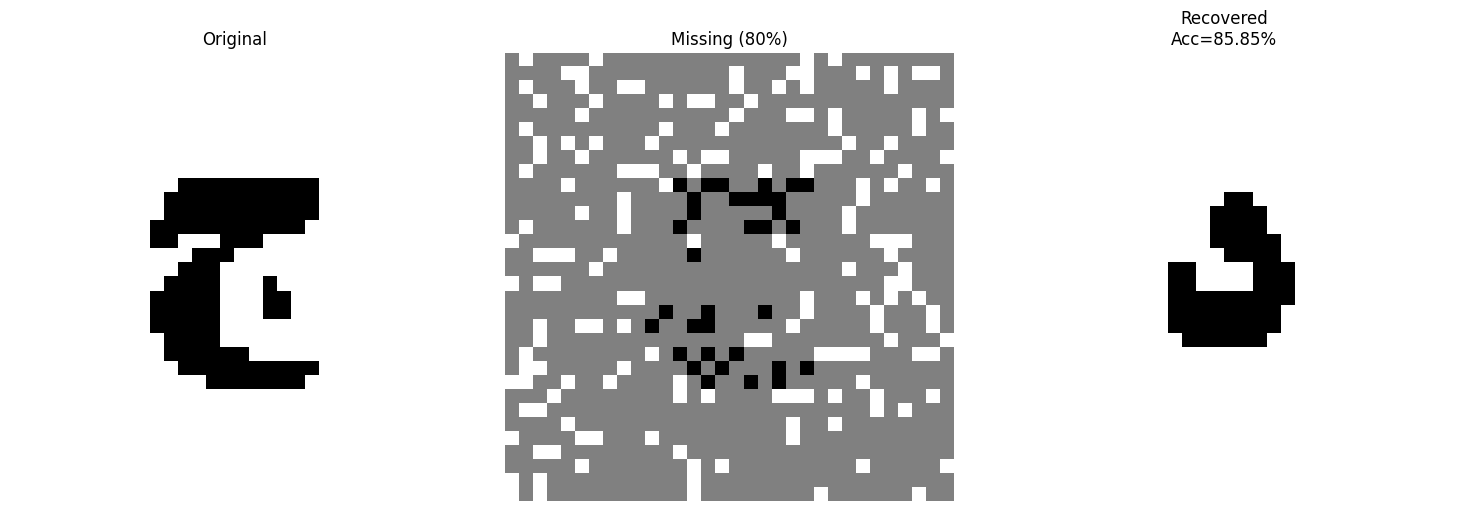

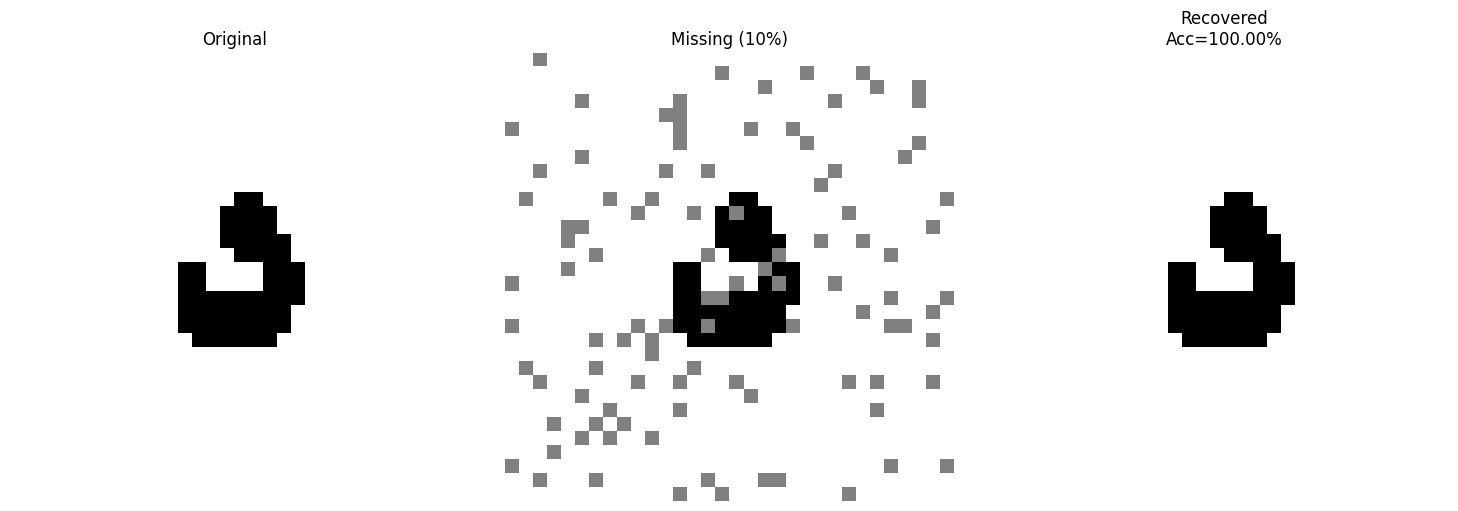

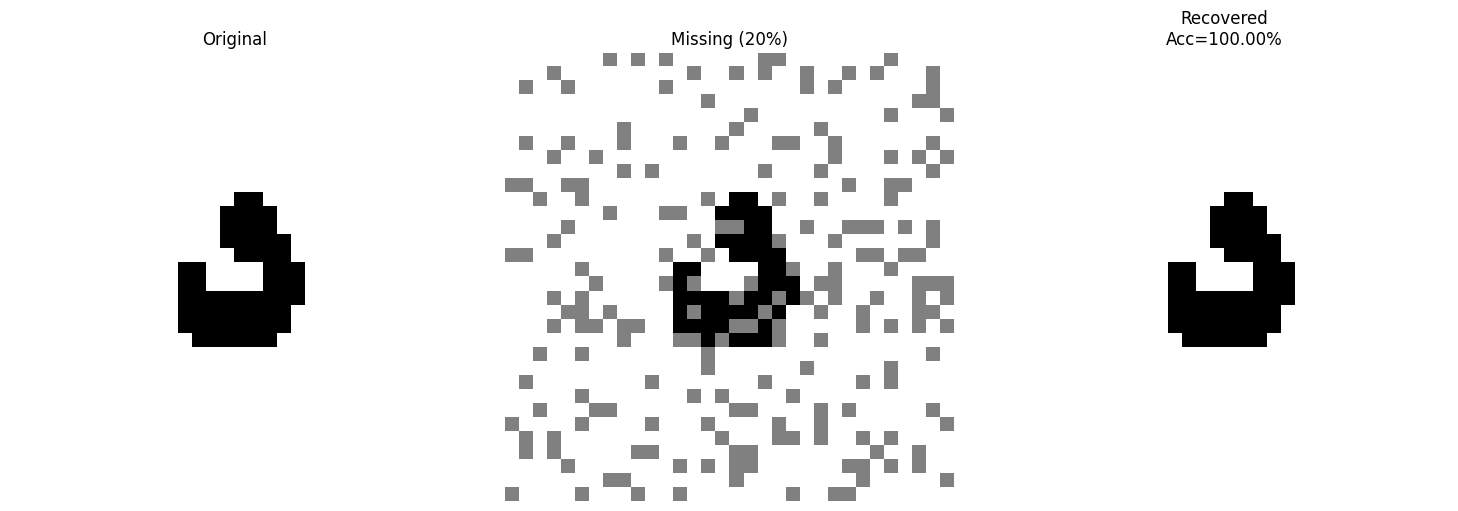

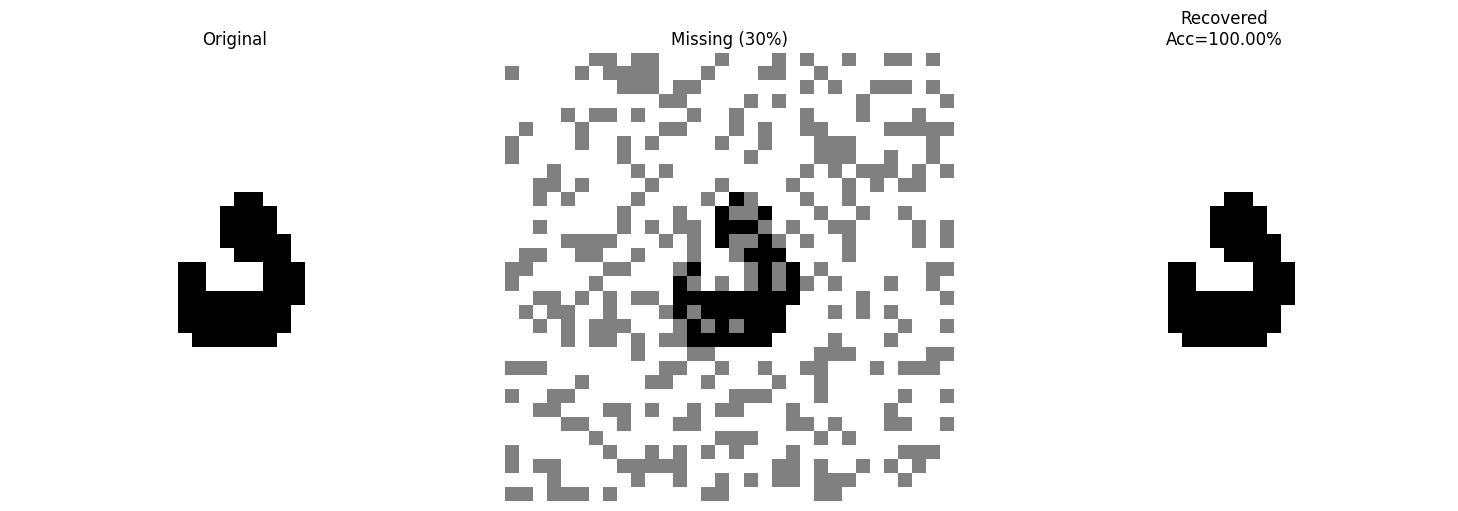

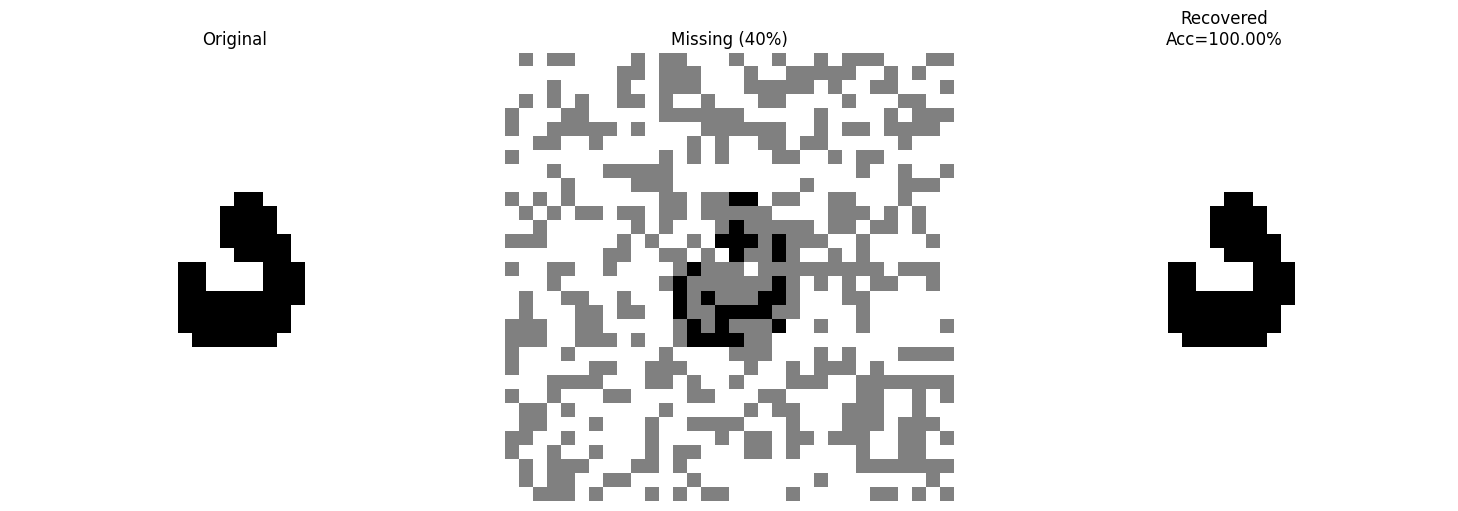

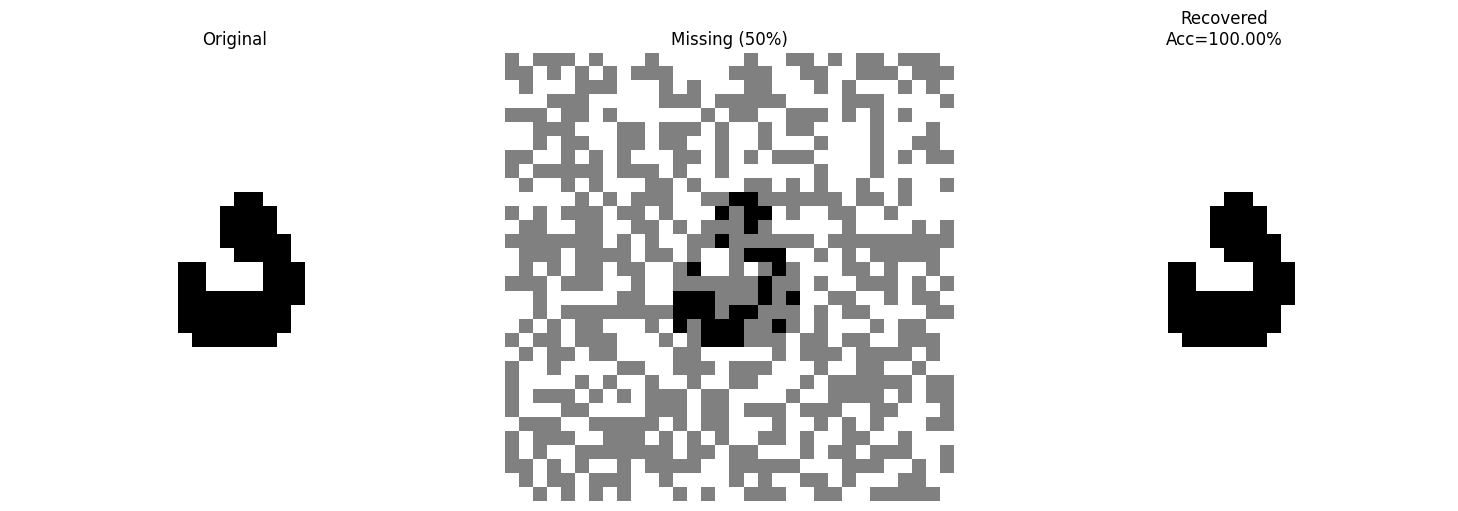

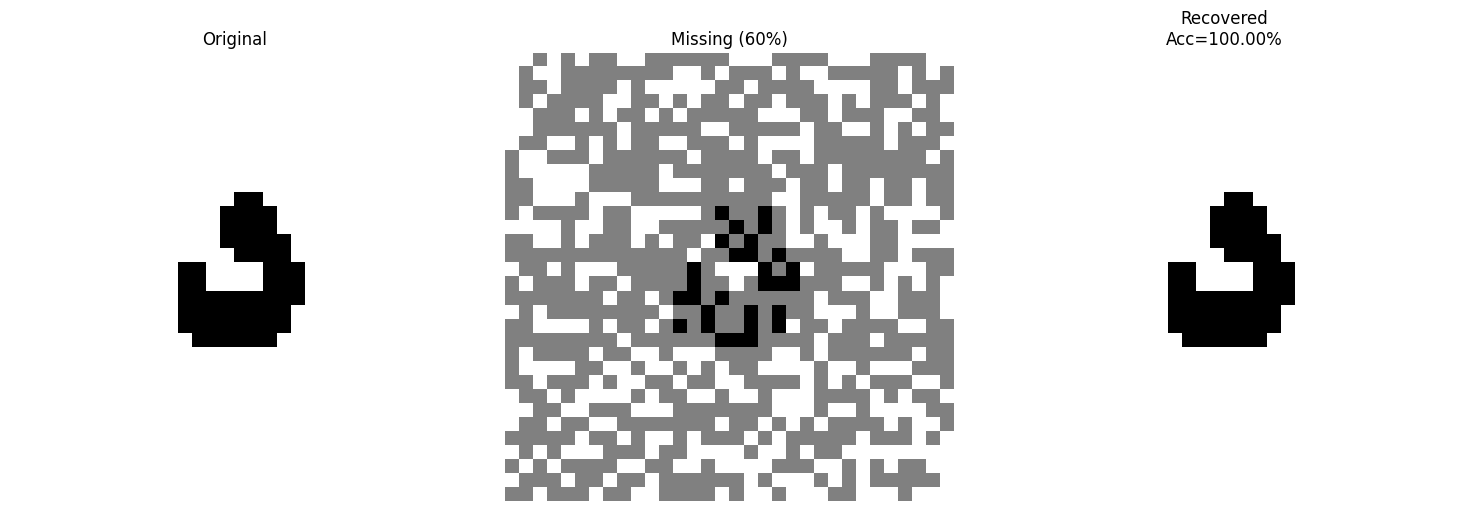

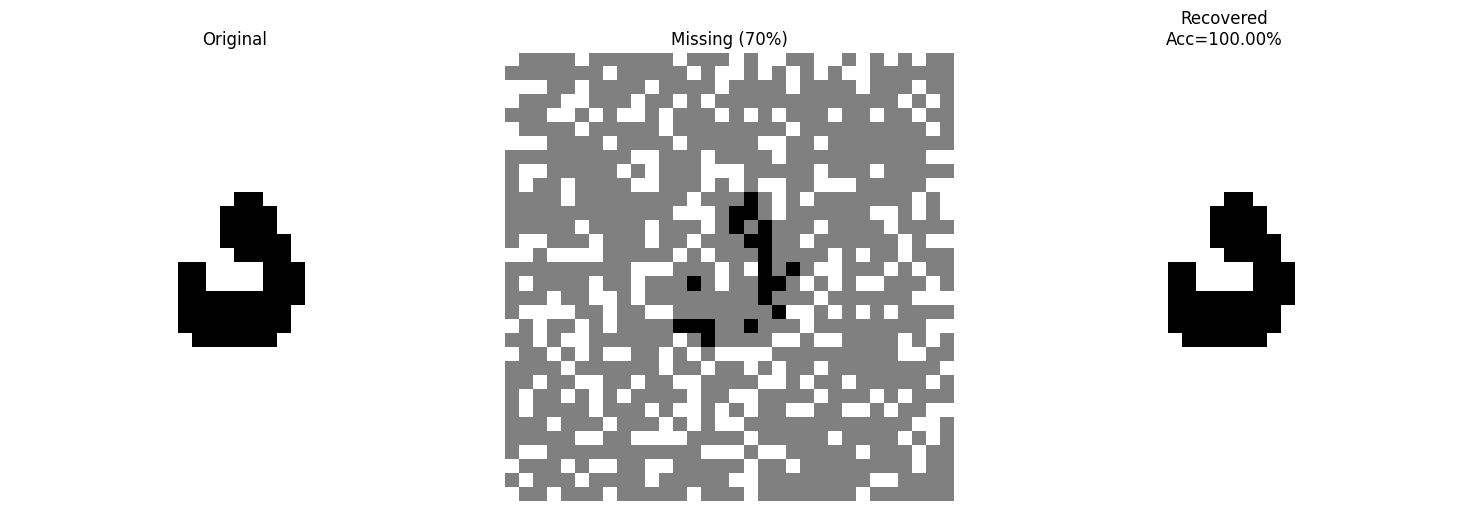

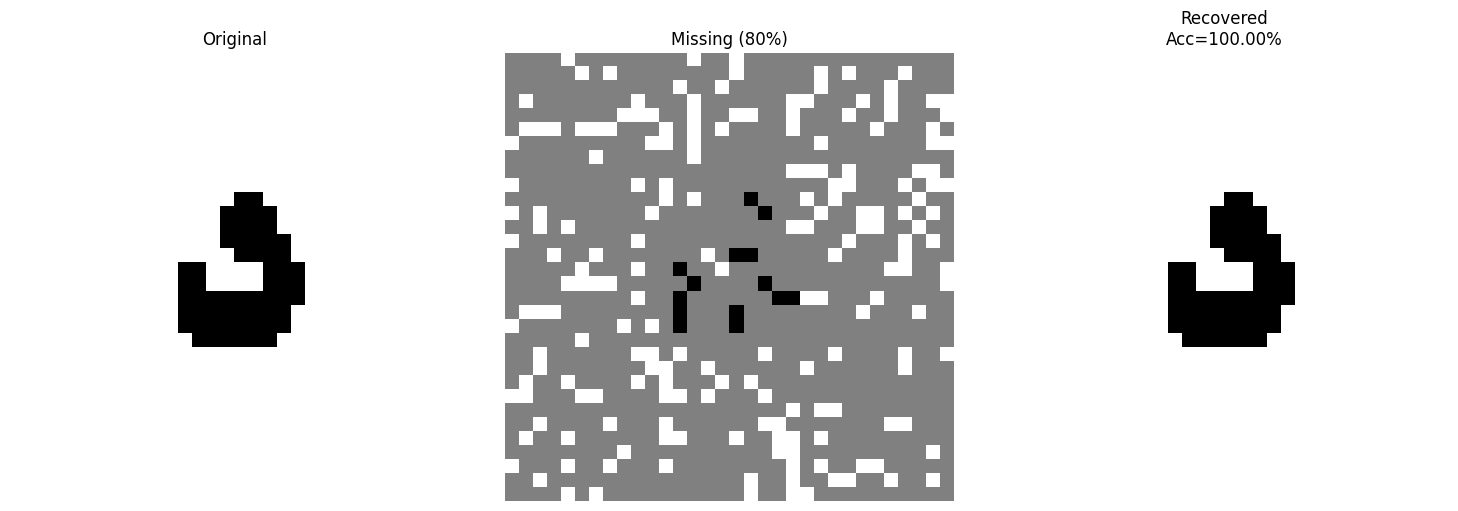

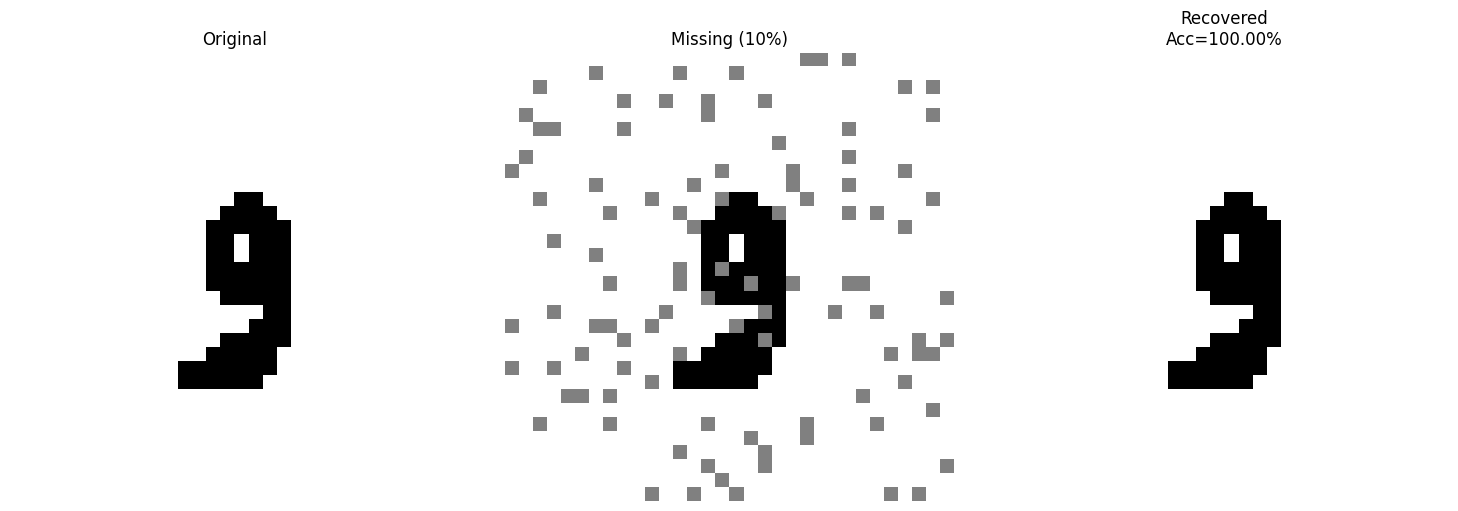

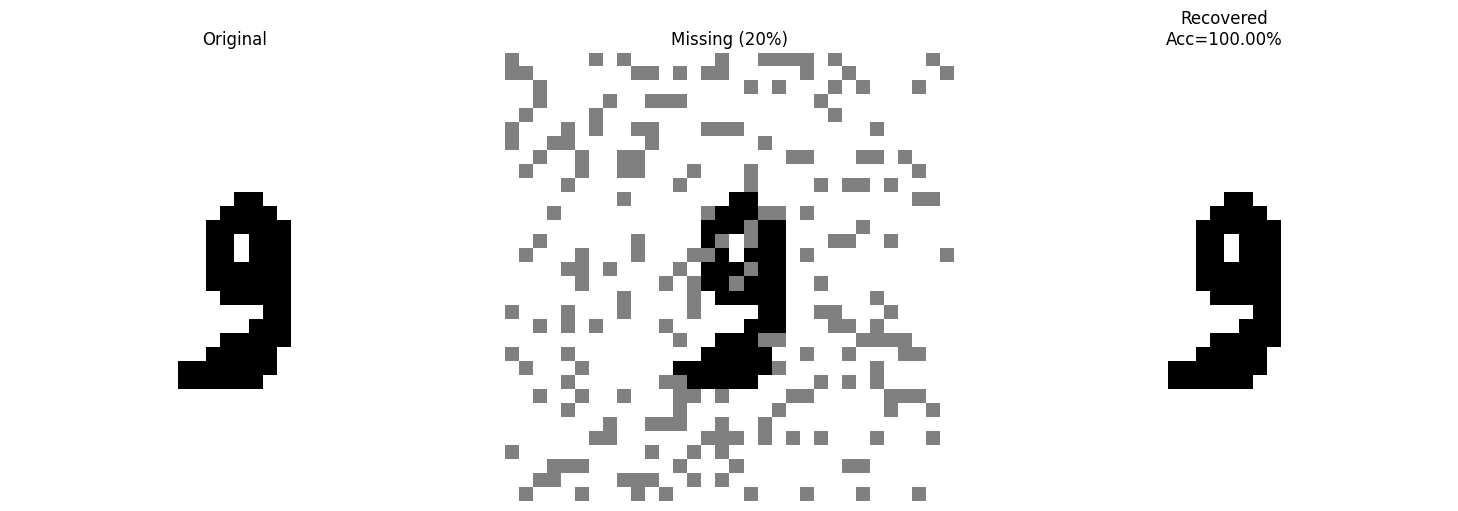

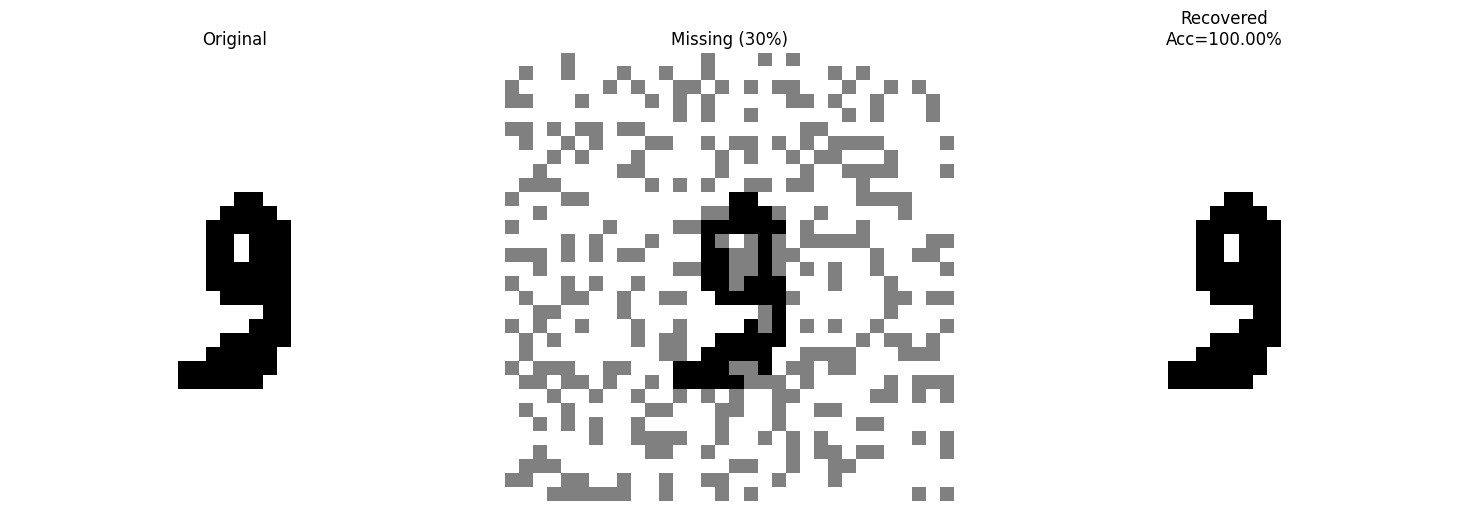

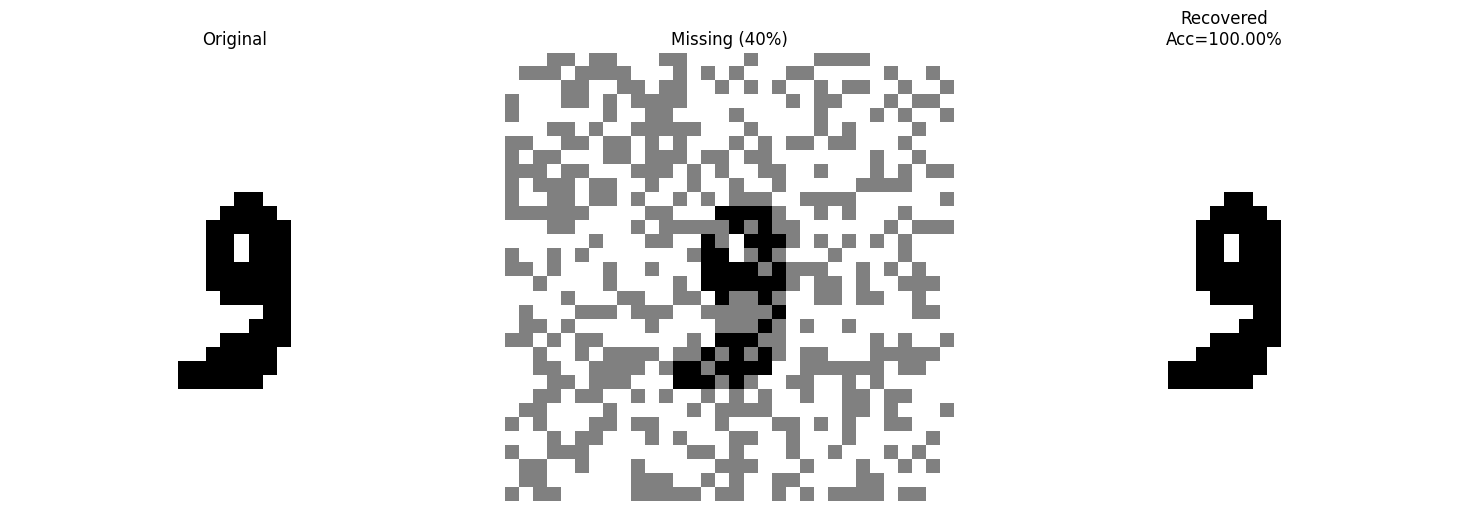

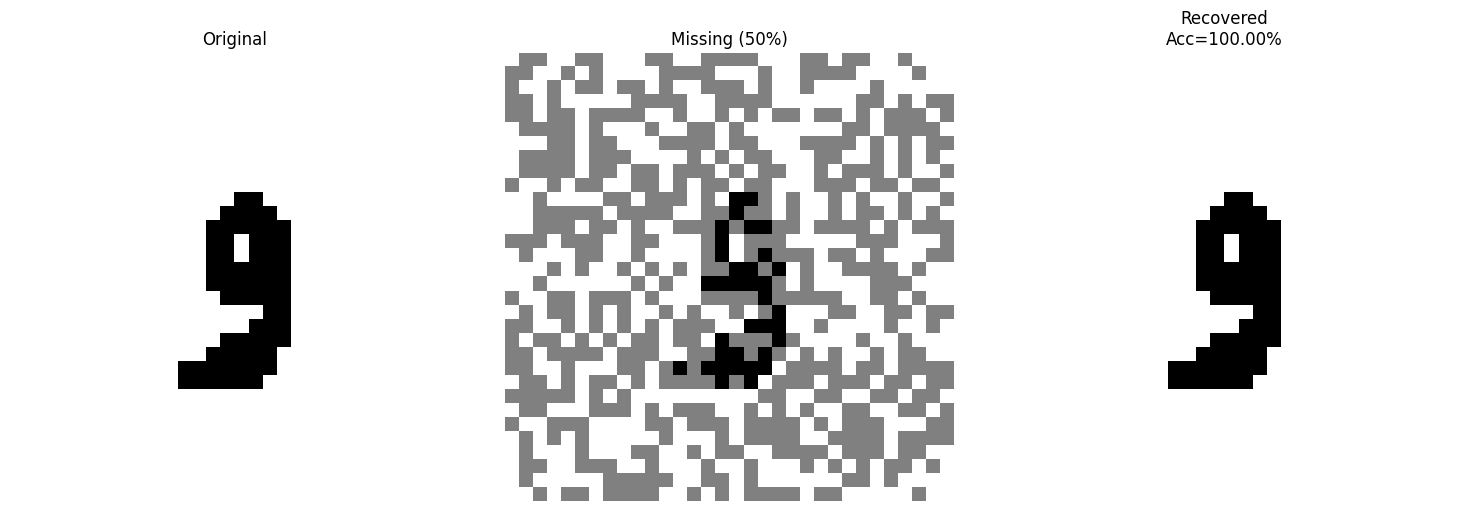

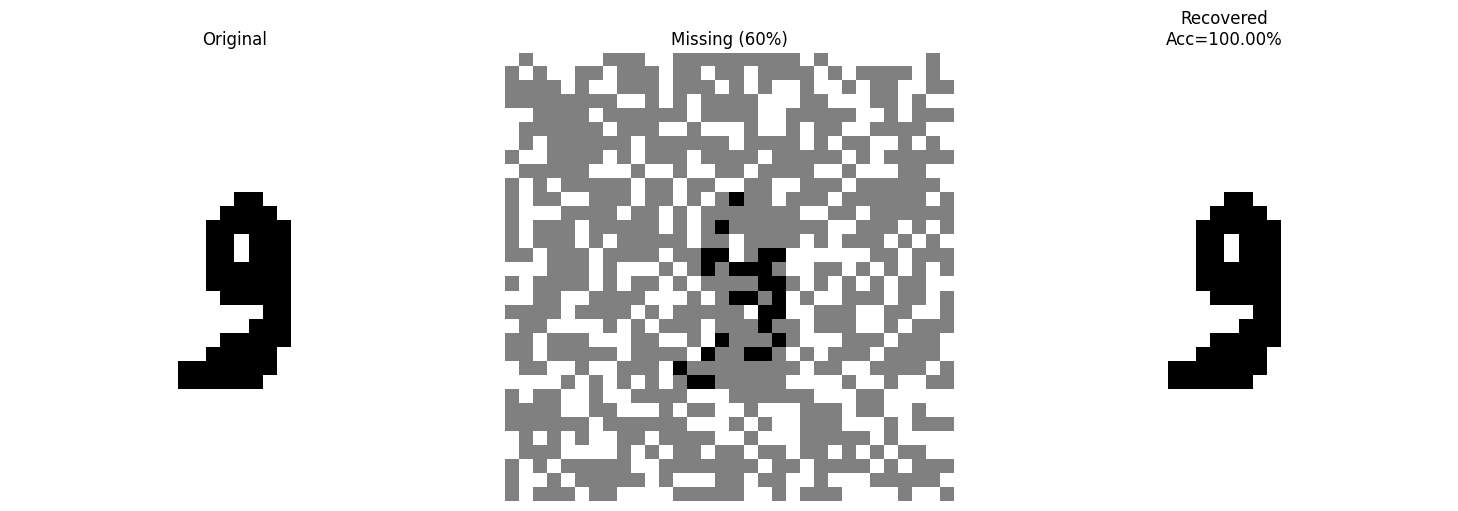

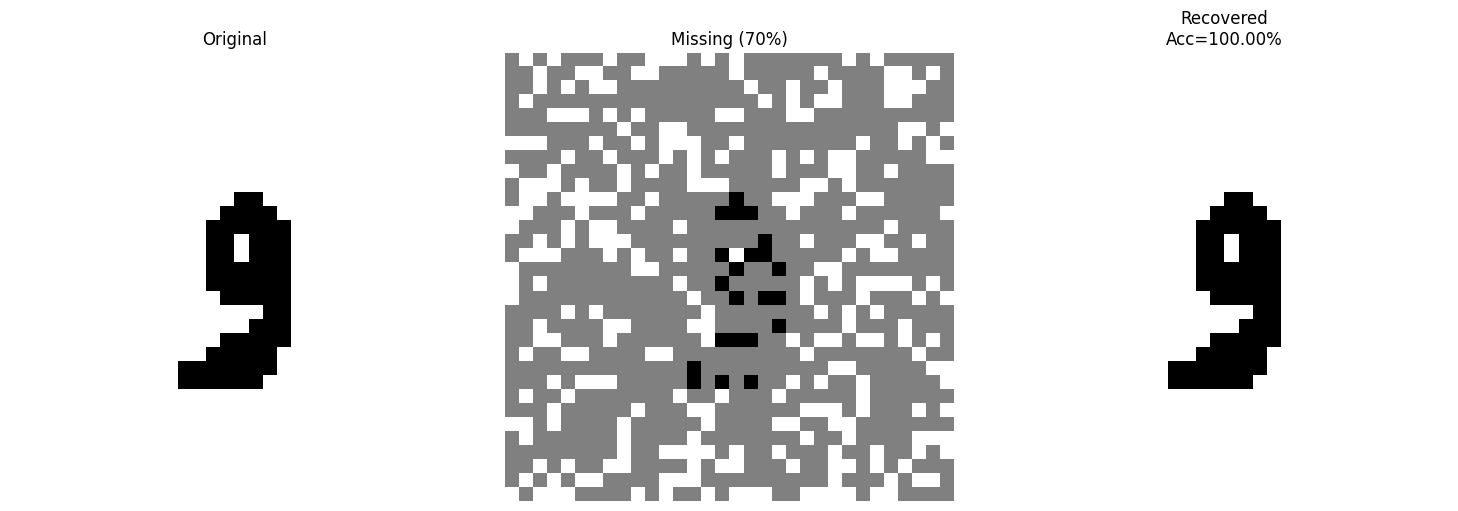

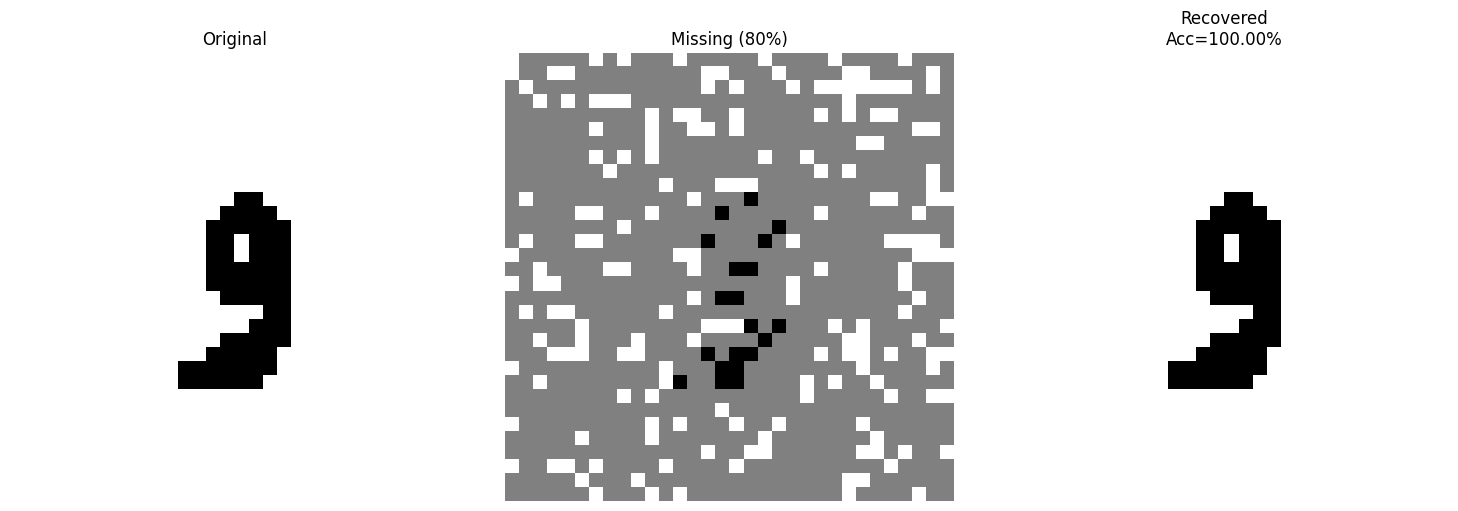

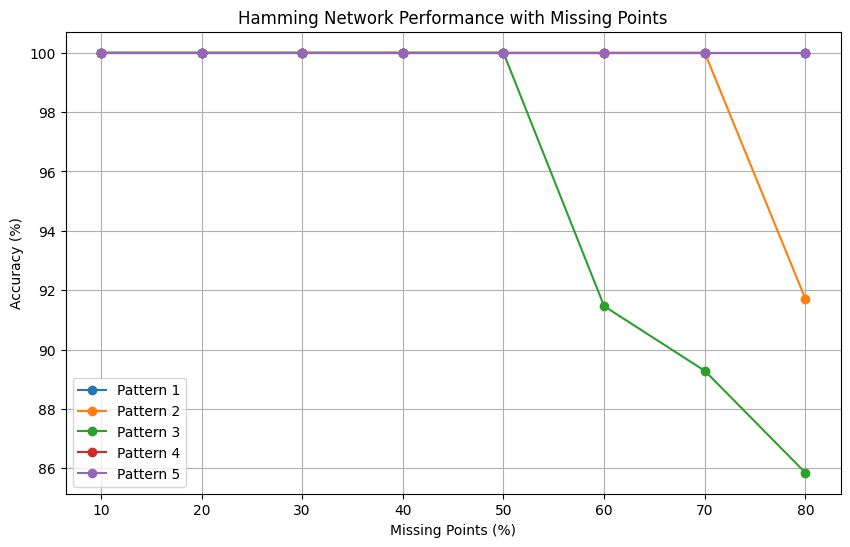

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional
from dataclasses import dataclass
import logging
from pathlib import Path
import csv

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

@dataclass
class ImageData:
    """Data class to store image information"""
    pattern: np.ndarray
    width: int
    height: int
    name: str

class ImageProcessor:
    """Handles image processing operations"""

    @staticmethod
    def convert_to_binary(
        image_path: str,
        target_size: Tuple[int, int] = (32, 32),
        threshold: int = 128
    ) -> ImageData:
        """Convert image to binary pattern."""
        try:
            path = Path(image_path)
            with Image.open(path) as img:
                img = img.convert("L")  # Convert to grayscale
                img = img.resize(target_size)
                image_array = np.array(img)

            binary_image = np.where(image_array > threshold, 1, -1)

            return ImageData(
                pattern=binary_image.flatten(),
                width=target_size[0],
                height=target_size[1],
                name=path.stem
            )
        except Exception as e:
            logger.error(f"Error processing image {image_path}: {str(e)}")
            raise

class NoiseGenerator:
    """Handles noise and missing point generation for patterns"""

    @staticmethod
    def add_noise(
        pattern: np.ndarray,
        noise_level: float,
        random_state: Optional[int] = None
    ) -> np.ndarray:
        """Add noise to pattern."""
        if random_state is not None:
            np.random.seed(random_state)

        noisy_pattern = pattern.copy()
        num_pixels = int(noise_level * pattern.size)
        indices = np.random.choice(pattern.size, num_pixels, replace=False)
        noisy_pattern.flat[indices] *= -1

        return noisy_pattern

    @staticmethod
    def add_missing_points(
        pattern: np.ndarray,
        missing_ratio: float,
        random_state: Optional[int] = None
    ) -> np.ndarray:
        """Add missing points to the pattern."""
        if random_state is not None:
            np.random.seed(random_state)

        missing_pattern = pattern.copy()
        num_missing = int(missing_ratio * pattern.size)
        indices = np.random.choice(pattern.size, num_missing, replace=False)
        missing_pattern.flat[indices] = 0  # Set missing points to 0
        return missing_pattern

class HammingNetwork:
    """Improved Hamming Network implementation"""

    def __init__(self, patterns: np.ndarray):
        """Initialize Hamming Network."""
        self.patterns = patterns
        self.num_patterns, self.size = patterns.shape
        self.weights = self._train()
        logger.info(f"Initialized network with {self.num_patterns} patterns")

    def _train(self) -> np.ndarray:
        """Train network weights"""
        return self.patterns / 2 + 0.5

    def recall(
        self,
        input_pattern: np.ndarray,
        return_similarity: bool = False
    ) -> Tuple[np.ndarray, Optional[float]]:
        """Recall pattern from network."""
        normalized_pattern = input_pattern / 2 + 0.5
        similarity = np.dot(self.weights, normalized_pattern)
        max_index = np.argmax(similarity)

        if return_similarity:
            return self.patterns[max_index], similarity[max_index]
        return self.patterns[max_index], None

def main_with_missing(
    image_paths: List[str],
    target_size: Tuple[int, int] = (32, 32),
    missing_levels: Optional[List[float]] = None,
    csv_output_path: str = "results_with_missing.csv"
):
    """Main function to test Hamming Network with missing points"""

    if missing_levels is None:
        missing_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # 10%, 20%, ..., 80%

    # Load and process images
    try:
        image_data = [
            ImageProcessor.convert_to_binary(path, target_size)
            for path in image_paths
        ]
        patterns = np.array([img.pattern for img in image_data])
        pattern_names = [img.name for img in image_data]
        logger.info(f"Loaded {len(patterns)} patterns")
    except Exception as e:
        logger.error(f"Failed to load patterns: {str(e)}")
        return

    # Initialize network
    network = HammingNetwork(patterns)
    noise_gen = NoiseGenerator()

    # Test network performance with missing points
    accuracies = []
    results = [["Pattern", "Missing Points (%)", "Accuracy"]]

    for i, original_pattern in enumerate(patterns):
        pattern_accuracies = []
        for missing_ratio in missing_levels:
            # Add missing points and recover pattern
            missing_pattern = noise_gen.add_missing_points(original_pattern, missing_ratio)
            recovered_pattern, _ = network.recall(missing_pattern)

            # Calculate accuracy (ignoring missing points)
            valid_indices = missing_pattern != 0
            matches = np.sum((recovered_pattern == original_pattern) & valid_indices)
            accuracy = matches / np.sum(valid_indices) * 100 if np.sum(valid_indices) > 0 else 0
            pattern_accuracies.append(accuracy)

            # Save result to CSV
            results.append([pattern_names[i], int(missing_ratio * 100), accuracy])

            # Visualize results (Original, Missing, Recovered)
            fig, axs = plt.subplots(1, 3, figsize=(15, 5))
            axs[0].imshow(original_pattern.reshape(target_size), cmap="gray")
            axs[0].set_title("Original")
            axs[0].axis("off")
            axs[1].imshow(missing_pattern.reshape(target_size), cmap="gray")
            axs[1].set_title(f"Missing ({int(missing_ratio * 100)}%)")
            axs[1].axis("off")
            axs[2].imshow(recovered_pattern.reshape(target_size), cmap="gray")
            axs[2].set_title(f"Recovered\nAcc={accuracy:.2f}%")
            axs[2].axis("off")
            plt.tight_layout()
            plt.show()

        accuracies.append(pattern_accuracies)

    # Save results to CSV
    with open(csv_output_path, mode="w", newline='') as f:
        writer = csv.writer(f)
        writer.writerows(results)
    logger.info(f"Results saved to {csv_output_path}")

    # Plot all accuracies in one chart
    plt.figure(figsize=(10, 6))
    for i, pattern_acc in enumerate(accuracies):
        plt.plot(
            [int(m * 100) for m in missing_levels],
            pattern_acc,
            marker='o',
            label=f"Pattern {pattern_names[i]}"
        )
    plt.title("Hamming Network Performance with Missing Points")
    plt.xlabel("Missing Points (%)")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Example usage
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]
    main_with_missing(image_paths)
